##PART A
##G8_APACHE_APEX


**KARTHIKEYAN.G **

**Assignment Part A - ANALYZING AND EVALUATING STREAMING FRAMEWORK**
<br/><br/>
## APACHE APEX

<img src = "https://upload.wikimedia.org/wikipedia/commons/3/3c/Apache_Apex_Logo.svg" width="10%" height="10%">

## 1. Overview:

Apex is a Hadoop YARN native platform that unifies stream and batch processing. It processes big data in-motion in a way that is highly scalable, highly performant, and fault tolerant, stateful, secure, distributed, and easily operable. Apex is written in Java, and Java is the primary application development environment.

The Apex is based on separate functional and operational specifications rather compounding them together. This makes application developers focus on writing User Defined Functions without having to think about how they will operate in distributed environment.

Apache Apex has rich library of commonly used functions. These are added as part of Apache Apex-Malhar library. This library has operators to access different filesystems, databases, message queues. Community is adding operators’ day-by-day making application developers’ life more easy.

When compared to Apache Spark, Apex comes with enterprise features such as event processing, guaranteed order of event delivery, and fault-tolerance at the core platform level. Unlike Spark, which needs strong Scala skills, Apex can be used by exiting Java developers. It is designed to run well within the existing Hadoop ecosystem, using YARN for scaling up or down while using HDFS for fault tolerance.

Apache Apex architecture can handle reading from and writing to message buses, file systems, databases or any other sources. As long as these sources have client code that can be run within a JVM, the integration works seamlessly.

Apex comes with a library of operators called Malhar, which are pre-built operators for data sources and destinations such as message buses, file systems, and databases. These operators enable developers to build quickly business logic that deals with a variety of data sources. The overall goal of Apex is to reduce the complexity of Big Data projects in enterprises.

## 2. APACHE APEX IN DETAIL 
<br/><br/>
Below picture depicts a typical streaming data pipeline. In the end-to-end scenario depicted in this illustration, we see Apex as the processing component. The processing can be complex logic, with operations performed in sequence or in parallel in a distributed environment. Apex runs on cluster infrastructure and currently supports and depends on Apache Hadoop, for which it was originally written. 
<br/><br/>
![Apex Architecture](https://drive.google.com/uc?id=1KsOsaedJ7Nn5Ly7rHvUzGke6CAh59wpj)
<br/><br/>
Apex supports integration with many external systems out of the box with connectors that are maintained and released by the project, including but not limited to the systems shown above. The most frequently used connectors are probably Kafka and file readers. Frequently used sinks for the computed results are files and databases, but results can also be delivered directly to a front-end system, such as for real-time reporting directly from the Apex application, a use case that we will look at later.
<br/><br/>
### a. Application Model and API
Apex applications can be written in a number of ways, using different APIs. Each of these varied source specifications are ultimately translated into a logical Apex Directed Acyclic Graph (DAG), which is then provided to the Apex engine for execution
<br/><br/>
- #### Directed Acyclic Graph (DAG)
An Apex application is represented by a DAG, which expresses processing logic as <b>operators (vertices)</b> and <b>streams (edges)</b>. Streams are unbounded sequences of pieces of data, also called events or tuples. The logic that can be executed is arranged in the DAG in sequence or in parallel. The resulting graph must be acyclic, meaning that any given tuple is processed only once by an operator. An exception to this is iterative processing, also supported by Apex, whereby the output of an operator becomes the input of a predecessor (or upstream operator), introducing a loop in the graph as far as the streams are concerned. This construct is frequently required for machine learning algorithms. Operators are the functional building blocks that can contain custom code specific to a single use case or generic functionality that can be applied broadly.
<br/><br/>
![Apex Application DEV Model](https://drive.google.com/uc?id=19uPI3rs8h4OZju8eB6WMJ7bj9dNOzy42)
<br/><br/>
#### Different APIs that Apex offers to develop applications
- #### Apex DAG Java API

The low-level DAG API is defined by the Apex engine. Any application that runs on Apex, irrespective of the original specification format, will be translated into this API. It is sometimes also referred to as compositional, as it represents the logical DAG, which will be translated into a physical plan and mapped to the execution layer by the Apex runtime. The flow of data is defined through streams, which are connections between ports. Ports are the endpoints of operators to receive data (input ports) or emit data (output ports). Each operator can have multiple ports and each port is connected to at most one stream (ports can also be optional, in which case they don’t have to be connected in the DAG). We will look at ports in more detail when discussing operator development. For now it is sufficient to know that ports provide the type-safe endpoints through which the application developer specifies the data flow by connecting streams.

- #### High-level Stream Java API

The high-level Apex Stream Java API provides an abstraction from the lower level DAG API discussed above. It is a declarative, fluent style API that is easier to learn for someone new to Apex. Instead of identifying individual operators, the developer works with methods on the stream interface to specify the transformations. The API will internally keep track of the operator(s) needed for each of the transformations and eventually translate it into the lower level DAG. 

- #### Windowing and time

Streams of unbounded data require windowing to establish boundaries to process data and emit results. Processing always occurs in a window, and there are different types of windows and strategies to assign individual data records to windows. Often the relationship of data processed and time is explicit, when the data contains a timestamp that identifies the event time, or when an event occurred. This is usually the case with streaming sources that emit individual events. However, there are also cases where time can be derived from a container. For example, when data arrives batched in hourly files, and time may be derived from the file name instead of individual records. Sometimes data may arrive without any timestamp, and the processor at the source would need to assign a timestamp based on arrival time or processing time in order to perform stateful windowed operations.

The windowing support provided by the Apex library that we discuss here largely follows the Apache Beam model. It is flexible and broadly applicable to different use cases. It is also completely different from and not be be confused with the Apex engine’s native arrival time based streaming window mechanism. The latter can be applied to use cases that don’t require event time handling: it assumes that the stream can be sliced into fixed time intervals (default 500ms), at which the engine performs callbacks that the operator can use to (globally) perform aggregate operations over multiple records that arrived in that interval. The intervals are aligned with the internal check pointing mechanism and suitable for processing optimizations such as flushing files or batching writes to a database. It cannot support transformation and other processing based on event time, because events in the real world don’t necessarily arrive in order and perfectly aligned with these internal intervals:
</br></br>
![Apex Windowing1](https://drive.google.com/uc?id=1Eos7y_P-iMyVMs6chO25ynObyGEQyqGL)
</br></br>
![Apex Windowing2](https://drive.google.com/uc?id=1FpVtzIT5E41AtpIKLKI_ai_KGnrnvg0P)


The example above shows a sequence of events, each with timestamp and in their processing order. Note the difference between processing and event time. It should be possible to process the same sequence at different times with the same result. That’s only possible when the transformations understand event time and are capable maintaining the computational state (potentially multiple open windows at the same time with high key cardinality). The example shows how the state tracks multiple windows (global, 4:00 and 5:00) and performs counting regardless of processing time.

- #### SQL

SQL is widely used for data transformation and access, not only with traditional relational databases but also in the Apache big data space with projects like Hive, Drill, Impala, and several others. 
Though it has been in use in the Hadoop space for years, SQL is relatively new in the stream processing area as a declarative approach to specify a streaming application. Apex is using Apache Calcite for its SQL support, which has already been adopted by many other big data processing frameworks.
Calcite accepts standard SQL, translates it into relational algebra, facilitates query planning and optimization to physical plan and allows for integration of any data source that can provide collections of records with columns (files, queues, and so on).

![SQL](https://drive.google.com/uc?id=1WDpOG_XpAu6t6DcsyONiE2Gid8TeW-z4)

- #### JSON

Another way of assembling applications without writing Java code is through JSON.
This format can be created manually, but it could also be used to generate the DAG from a different frontend, like a visual tool. Just like applications that are written in Java, the JSON files will be included in the application package, along with the operator dependencies. Upon launch of the application, the Apex client will parse these files and translate them into a native DAG representation.
</br></br>
### b. Feautures OF APEX

The Apex project was focused on enterprise-readiness as a key architectural requirement, including aspects such as

- The fault tolerance and high availability of all components, automatic recovery from failures, and the ability to resume applications from previous state.
- Stateful processing architecture with strong processing guarantees (end-to-end exactly-once) to enable mission critical use cases that depend on correctness.
- Scalability and superior performance with high throughput and low latency and the ability to process millions of events per second without compromising fault tolerance, correctness and latency.
- Security, multi-tenancy and operability, including a REST API with metrics for monitoring, and so on
- A comprehensive library of connectors for integration with the external systems typically found in enterprise architecture. The library is an integral part of the project, maintained by the community and guaranteed to be compatible with the engine.
- Ability for code reuse in the JVM environment, and Java as the primary development language, which has a very rich ecosystem and large developer base that is accessible to the kinds of customers who require big data solutions

<br/><br/>
![Apex Summary](https://drive.google.com/uc?id=1UX9PnwvcC5KQh8Vr_a1hJJgmo4CGVDhL)

![Apex Fault Tolerance](https://drive.google.com/uc?id=1oNtlkXVK-OTeKPk_mh-GWkJPrmxVwMOc)
</br></br>
Below image showcases stateful stream processing (as found in Apex and Flink) compares to the micro-batch based approach in Apache Spark Streaming.

![Stateless](https://drive.google.com/uc?id=1O2Q_AT1Sfy4rWJctMfpYATpFLN7xkw3E)
</br></br>
### c. Apache Apex Architecture
Apache Apex Architecture image is provided below:

![Apex Architecture](https://drive.google.com/uc?id=17d4W-8QC4aUGCWRvTwqdYYo47P4YeQWL)
- There are two parts of Apache Apex: Apex Core and Apex Malhar. 
- Apex Core is the platform or framework for building distributed applications on Hadoop.
- The core Apex platform is supplemented by Malhar, a library of connector and logic functions, enabling rapid application development. These input and output operators provide templates to sources and sinks such as Alluxio, S3, HDFS, NFS, FTP, Kafka, ActiveMQ, RabbitMQ, JMS, Cassandra, MongoDB, Redis, HBase, CouchDB, generic JDBC, and other database connectors.
- Custom Operators are user built connectors and logical functions for application development.
- YARN is the core library of Hadoop 2.x that is tasked with resource management and works as a distributed application framework.
- All streams can be persisted (by default in HDFS)
</br></br>

#### Streaming Computational Model

The <b>platform</b> for Apex is a <b>Hadoop YARN native application</b>. It runs in a Hadoop cluster just like any other YARN application (MapReduce etc.) and is designed to seamlessly integrate with rest of Hadoop technology stack. It leverages Hadoop as much as possible and relies on it as its distributed operating system. 

Applications running in the platform are represented by a <b>Directed Acyclic Graph (DAG)</b> made up of operators and streams. All computations are done in memory on arrival of the input data, with an option to save the output to disk <b>(HDFS)</b> in a non-blocking way. 

The data that flows between operators consists of atomic data elements. Each <b>data element</b> along with its type definition (henceforth called schema) is called a <b>tuple</b>. 

The <b>streaming application is monitored</b> by a decision making entity called <b>STRAM (streaming application manager)</b>. STRAM is designed to be a light weight controller that has minimal but sufficient interaction with the application. This is done via periodic heartbeats. 

A fundamental <b>building block</b> for the streaming platform is the concept of <b>breaking up a stream into equal finite time slices</b> called <b>streaming windows</b>. Each window contains the ordered set of tuples in that time sliceEach window is preceded by a begin_window event and is terminated by an end_window event, and is assigned a unique window ID. 
A <b>streaming window</b> is an abstraction of many tuples into a higher atomic event for easier management.  An <b>application window</b> is a group of consecutive streaming windows used for data aggregation (e.g. sum, average, maximum, minimum) on a per operator level.

Alongside the platform, a set of predefined, benchmarked standard library operator templates is provided for ease of use and rapid development of application. These operators are open sourced to Apache Software Foundation under the project name “Malhar” as part of our efforts to foster community innovation. These operators can be used in a DAG as is, while others have properties that can be set to specify the desired computation. 

#### Components of the Model
- ###### Streaming Application Manager (STRAM): 
 - Streaming Application Manager (STRAM) is the Hadoop YARN native application master. 

- ###### Hadoop Components: A streaming application runs as a native Hadoop 2.x application. Hadoop 2.x does not differentiate between a map-reduce job and other applications. This means that your application leverages all the bells and whistles Hadoop provides and is fully supported within Hadoop technology stack. 

 - YARN: YARN is the core library of Hadoop 2.x that is tasked with resource management and works as a distributed application framework. 
 - Resource Manager(RM): ResourceManager(RM) manages all the distributed resources. It allocates and arbitrates all the slots and the resources (cpu, memory, network) of these slots. Currently memory usage is monitored by RM; in upcoming releases it will have CPU as well as network management. 
 - Application Master(AM): The AM is the watchdog or monitoring process for your application and has the responsibility of negotiating resources with RM and interacting with NodeManagers to get the allocated containers started. The AM itself runs in one container. All resource management within the application are managed by the AM. STRAM is a native YARN ApplicationManager.

- ##### Node Managers (NM) 
There is one NodeManager(NM) per node in the cluster. All the containers (i.e. processes) on that node are monitored by the NM. It takes instructions from RM and manages resources of that node as per RM instructions.
- ##### RPC Protocol
Communication among RM, AM, and NM is done via the Hadoop RPC protocol. 
- ##### HDFS
Hadoop includes a highly fault tolerant, high throughput distributed file system (HDFS). It runs on commodity hardware, and your streaming application will, by default, use it. 

#### Processing Guarantees

The Apex engine by default guarantees that data is processed at-least-once and that state updates within the DAG occur exactly-once. 
In distributed systems, a guarantee of the exactly-once processing is not really possible since nodes may go down at any time and when they are restored, some reprocessing of prior data, however minimal, must occur in order to guarantee correctness (or we have to accept data loss, which yields at-most-once processing). 

The application developer in Apex can influence processing semantics by choosing the processing mode on a per-operator basis through the PROCESSING_MODE attribute. 
- AT_LEAST_ONCE: On recovery, state will be restored to a checkpoint and the input stream rewound to the corresponding streaming window, as previously discussed. This is the default mode; it ensures that no messages are lost and it forms the basis for the exactly-once output that will be covered later.
- AT_MOST_ONCE: Data is not processed more than once, but it is possible that some of it won't be processed at all and therefore some data can be lost. This is normally not acceptable. This mode has faster recovery time, since processing will resume from the latest available streaming window instead of rewinding the stream to the checkpoint window. This is potentially suitable for use cases that require only the latest data.
- EXACTLY_ONCE: This processing mode is really a misnomer and should not be confused with effective-once or end-to-end exactly-once, which we will cover later. This processing mode means that an operator will be checkpointed after every streaming window (which is very inefficient), and it still has a very small possibility of incorrect results when the engine fails to complete the checkpoint write after the operator endWindow() callback was completed (it is not a distributed transaction). In short, this mode should be avoided as it comes at high cost for questionable benefit. Hopefully, it will be removed in a future Apex version. Practical exactly-once options will be covered here.

With this inventory of available modes, it is almost always best to go with the default (at-least-once)! Having the guarantee of no data loss, we can complement at-least-once processing with two more ingredients to achieve the exactly-once results. Combined with idempotency and consistent state, it is possible to guarantee that ultimately the result is end-to-end exactly-once, even when after a recovery some reprocessing has to occur. Apex was first among the stream processors to support the end-to-end exactly-once results guarantee through several of its connectors.

This guarantee is supported by three features of the Apex platform:
 - The distributed checkpointing discussed earlier
 - Specific capabilities of certain connectors to external systems
 - The repeatable processing order guarantees within the DAG (not related to and not to be confused with the out of order input from sources)

## 3 .Use Cases of Apache APEX:
Apex is a platform and framework on top of which specific applications (or solutions) are built. As such, Apex is applicable to to a wide range of use cases, including real-time machine learning model scoring, real-time ETL (Extract, Transform, and Load), predictive analytics, anomaly detection, real-time recommendations, and systems monitoring:
</br></br>
![Apex Industry](https://drive.google.com/uc?id=1zHk86OHBVEzzZij8x2pInvMgvfecKemA)
</br></br>
### a.Silver Spring Networks (SSN)

Silver Spring Networks (SSN) helps global utilities and cities connect, optimize, and manage smart energy and smart city infrastructure. It provides smart grid products and also develops software for utilities and customers to improve their energy efficiency. SSN is one of the world's largest IOT companies, receiving data from over 22 million smart meters and connected devices, reading over 200 billion records per year, and conducting over two million remote operations per year.

As SSN's network and volume, variety, and velocity of data began to grow, it started to ponder:
- How to obtain more value out of its network of connected devices
- How to manage the growing number of devices, access their data, and ensure the safety of their data
- How to integrate with third party data applications quickly
SSN's answer to these questions would be informed by its needs, which included:
- A broad variety of incoming data, including sensor data, meter data, interval data, device metadata, threshold events, and traps
- Multi-tenancy and shared resources to save costs, with centralized management of software and applications
- Security, including encryption of both data-at-rest and data-in-motion, auditing of data, and no loss of data across tenants
- Ability to scale, based on the millions of connected devices in its network, as well as over eight billion events per day and volume of over 500 GB each day
- High availability and disaster recoverability of its cluster, with automated failovers as well as rolling upgrades

SSN chose Apex as its solution due to the following factors:
- The availability of pre-existing and prebuilt operators as part of the Apex Malhar library
- The ability to develop applications quickly
- Apex's operability and auto-scaling capabilities
- Apex's partitioning capabilities, leading to scalability
- Java programmers are able to learn Apex application development quickly
- Operations are handled by Apex and don't require hands on management

![Apex SmartEnergy](https://drive.google.com/uc?id=1odjBwPTMrt_QHzizvjBaq5gXSV3uJHnH)
</br></br>
### b.Industrial IoT applications (GE)
General Electric (GE) is a large, diversified company with business units in energy, power, aviation, transportation, healthcare, finance, and other industries. 
The GE Predix platform enables users to develop and execute Industrial IoT applications to gain real-time insights about their devices and their usage, as well as take actions based on these insights. 

Certain services offered by Predix are powered by Apache Apex. GE selected Apex for these services based on the following features 
- High performance and distributed computing
- Dynamic partitioning
- Rich library of existing operators
- Support for at-least-once, at-most-once, and exactly-once processing
- Hadoop/YARN compatibility
- Fault tolerance and platform stability
- Ease of deployment and operability
- Enterprise grade security

One Predix service that runs on Apex is the Time Series service, which leverages Apex due to its speed, scalability, high performance, and fault tolerance capabilities.
The service provides:
- Efficient storage of time series data
- Data indexing for quick retrieval
- Industrial focused query modes
- High availability and horizontal scalability
- Millisecond data point precision

By running Apex, users of the Time Series service are able to:
- Ingest and analyze high-volume, high speed data from thousands of devices, sensors per customer in real-time without data loss
- Run predictive analytics to reduce costly maintenance and improve customer service
- Conduct unified monitoring of all connected sensors and devices to minimize disruptions
- Have fast application development cycles
- Meet changing business and application workloads due to Apex's high scalability

Another Predix service leveraging Apex is the Stream Processing service, which provides predefined flows to support data conversion, manipulation, or processing of large volumes of real-time data before delivering it to the event hub or storage layer. This service provides the following capabilities to users:
- Raw data ingestion
- Fault tolerance, allowing data to be processed despite machine or node failures
- Apex as the runtime engine (Spark and other engines will be supported in future releases)
- Multi-tenancy support
- Security (UAA integrated)

![Apex IoT](https://drive.google.com/uc?id=1TXmnqLZFLke-QC2nMqTZOmzQWrevToDM)
</br></br>

### c. Real-time threat detection (Capital One)
Capital One is currently the eighth largest bank in the U.S. One of its core areas of business was facing vast and increasing costs for an existing solution to guard against digital threats. The bank set out to find a new solution that would deliver better performance while also being more cost effective.

At the time, Capital One was processing several thousand transactions every second. The bank's innovation team established that the solution must be able to process data within low double-digit milliseconds latency, scale easily, ensure that it runs internal algorithms with zero data loss, and also be highly available. Additionally, the team realized that tackling this challenge would require dynamic and flexible machine learning algorithms in a real-time distributed environment.

With Apache Apex, Capital One was able to:
  - Achieve latency in single-digit milliseconds, which is significantly lower than the double digit millisecond latency that the bank set out to achieve and which is a hard requirement for use cases such as online transactions.

  - Meet the SLA requirements of continuously running the data pipeline applications with 99.999% uptime on 24x7 basis, with automatic failover

  - Reduce the total cost of ownership, based on Apex's ability to run on Hadoop and scale out with commodity grade hardware

  - Easily add newer applications and features to accurately detect suspicious events without being tied to the vendor roadmap and timeline

  - Focus on core business algorithms and innovation, while the platform took care of fault tolerance, operability, scalability, and performance

Furthermore, Capital One's implementation of Apex enabled the following:

- Parallel Model Scoring

- Dynamic Scalability based on Throughput or Latency

- Live Model Refresh, parallelized model scoring


![Capitalone](https://drive.google.com/uc?id=1Xc43r8rtv6elotcrcmGwG1XPol3MfWWN)
</br></br>
#### d. Real-time insights for Advertising Tech (PubMatic)

Companies in the advertising technology (AdTech) industry need to address data increasing at breakneck speed, along with customers demanding faster insights and analytical reporting.
PubMatic is a leading AdTech company providing marketing automation for publishers and is driven by data at a massive scale. On a daily basis, the company processes over 350 billion bids, serves over 40 billion ad impressions, and processes over 50 terabytes of data. 

PubMatic decided to pursue a real-time streaming solution so that it could provide publishers, demand side platforms (DSPs), and agencies with actionable insights as close to the time of event generation as possible. PubMatic's streaming implementation had to achieve the following:
- Ingest and analyze a high volume of clicks and views (200,000 events/sec) to help their advertising customers improve revenues
- Utilize auction and client log data (22 TB/day) to report critical metrics for campaign monetization
- Handle rapidly increasing network traffic with efficient utilization of resources
- Provide a feedback loop to the ad server for making efficient ad serving decisions.
	
PubMatic decided to implement its real-time streaming solution with Apex based on the following factors:
- Time to value - the solution was able to be implemented within a short time frame
- The Apex applications could run on PubMatic's existing Hadoop infrastructure
- Apex had important connectors (files, Apache Kafka, and so on) available out of the box
- Apex supported event time dimensional aggregations with real-time query capability

With the Apex-based solution, deployed to production in 2014, PubMatic's end-to-end latency to obtain updated data and metrics for their two use cases fell from hours to seconds. This enabled real-time visibility into successes and shortcomings of its campaigns and timely tuning of models to maximize successful auctions.

![PUBMATIC](https://drive.google.com/uc?id=1D-otKvjtY8KHXu90eOb_PW0qVI_30Tj5)
</br></br>
## 4. Pros and Cons

| Pros | Cons |
| ----------- | ----------- | 
|<li> Apache Apex is scalable, easy to use, and user friendly. </li><li> It provides real-time insights with greater program ability, supports batch processing, and maintains a large volume of data expeditiously offering high throughput on streaming. </li><li> Being a distributed architecture is compatible with various business intelligence tools. </li><li> Scalability is adopted by partitioning which allows work distribution and adaptation to load spikes. </li><li> As being a data-driven streaming analytics solution Apache Apex focuses on operator allocation, execution time and allows developers to understand the delicate environment between networking and serialization cost. </li><li> It provides real-time insights with greater program ability, supports batch processing, and maintains a large volume of data expeditiously offering high throughput on streaming. </li><li> Strong processing guarantees (end-to-end exactly once) </li><li> Secure, supports fault-tolerance and multi-tenancy </li>| <li>It's quite tough when it comes to implementation and working with the procedures, one needs to be a Tech-savvy.</li><li>Being a top-notch Hadoop tool users might find difficulty in resource allocation.</li><li>Programming Interface is based on Java, though it supports JVM based languages, still lacks the convenience for design and development.</li><li>Limited support for SQL</li><li>Difficult to find skilled users</li><li>Apex is no longer widely used and no vendor is currently supporting this framework at scale</li>|

#### a.Apex excels
Overall, Apex has characteristics that positively impact time to production, quality, and cost. It is a particularly good fit for use cases that require:

- High performance and low latency, possibly with SLA
- Large scale, fault tolerant state management and end-to-end exactly-once processing guarantees
- Computationally complex production pipelines where accuracy, functional stability, security and certification are critical and ad hoc changes not desirable

![APEXExcel](https://drive.google.com/uc?id=17M0ftPu-LHrpF16a0oJNQApuQJwlNmk-)

#### b.Apex failings
- Data exploration in ad hoc, experimental environments such as Spark's interactive shell.
- Machine learning. Apex currently does not have its own library of machine learning algorithms, although it does have the capability for iterative processing and can be used as execution engine as seen in Apache SAMOA.
- Interactive SQL. Apex has basic support for streaming SQL transformations, but is not comparable to Hive or similar tools.

##PART B
##G8_BREAST_CANCER_WISCONSIN


**KARTHIKEYAN.G**

## 1.IMPORT LIBRARIES/DATASET

In [0]:
#**************************************************************************#
#Import all libraries for using in the program                             # 
#**************************************************************************#
#            TEAM MEMBERS                                                  #
#--------------------------------------------------------------------------#
#           Name                    BITS ID                                #
#--------------------------------------------------------------------------#
#      KARTHIKEYAN G               2021MT13339                             #
#      ABHAY PRABHAKARRAO DESHMUKH 2022MT12415                             #
#      THARUN P DYARAM             2022MT12338                             #
#      VARENYA VARSHNEY            2021MT13019                             #
#      HEMANT KUMAR SINGH          2022MT12503                             #
#--------------------------------------------------------------------------#
#**************************************************************************#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

#**************************************************************************#
# PYSPARK related libraries                                                #
#**************************************************************************#
from pyspark.sql.types import StringType, IntegerType,StructType, StructField
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F
from pyspark.sql.functions import mean
from pyspark.sql import Window
import seaborn as sns 
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit
from pyspark.sql.functions import when
from pyspark.sql.functions import log
from pyspark.sql.types import FloatType, DoubleType
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import copy
#spark = SparkSession.builder.appName("Analyze Breast Cancer Data").getOrCreate()
#spark = sparksql.SparkSession.builder.appName("Analyze Breast Cancer Data").getOrCreate()
spark = SparkSession.builder.appName("Analyze Breast Cancer Data").getOrCreate()

#**************************************************************************#
# PYSPARK ML LIBRARIES                                                     #
#**************************************************************************#
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression,RandomForestClassifier, DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE
from pyspark.sql.functions import col as COL
from pyspark.mllib.evaluation import BinaryClassificationMetrics as BCM
from pyspark.mllib.evaluation import MulticlassMetrics as MCM
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline


epsilon = 1e-16

## 2. DATA VISUALIZATION AND EXPLORATION
## 3. DATA PREPROCESSING AND CLEANING

In [0]:
#**************************************************************************#
#Renamed below fields                      |           Alias               # 
#**************************************************************************#
#Sample_code_number:integer                |          S.No
#Clump Thickness:integer                   |          Clump_Tk 
#Uniformity of Cell Size:integer           |          Uniformity_Cell_Sz
#Uniformity of Cell Shape:integer          |          Uniformity_Cell_Sp
#Marginal Adhesion:integer                 |          Mrgnl_Adsion
#Single Epithelial Cell Size:integer       |          Sngl_Epith_Cell_Sz
#Bare Nuclei:integer                       |          Bare_Nuclei
#Bland Chromatin:integer                   |          Bland_Chromatin
#Normal Nucleoli:integer                   |          Normal_Nucleoli 
#Mitoses:integer                           |          Mitoses
#Class:integer                             |          Class   

schema = StructType([StructField("SNo",IntegerType(),True),
                     StructField("Clump_Tk",IntegerType(),True),
                     StructField("Uniformity_Cell_Sz",IntegerType(),True),
                     StructField("Uniformity_Cell_Sp",IntegerType(),True),
                     StructField("Mrgnl_Adsion",IntegerType(),True),
                     StructField("Sngl_Epith_Cell_Sz",IntegerType(),True),
                     StructField("Bare_Nuclei",IntegerType(),True),
                     StructField("Bland_Chromatin",IntegerType(),True),
                     StructField("Normal_Nucleoli",IntegerType(),True),
                     StructField("Mitoses",IntegerType(),True),
                     StructField("Class",IntegerType(),True)])
        
df = spark.read.format("csv").option("header", "true").schema(schema).load("dbfs:/FileStore/tables/breast_cancer_wisconsin.csv")
df.show()

+-------+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|    SNo|Clump_Tk|Uniformity_Cell_Sz|Uniformity_Cell_Sp|Mrgnl_Adsion|Sngl_Epith_Cell_Sz|Bare_Nuclei|Bland_Chromatin|Normal_Nucleoli|Mitoses|Class|
+-------+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|1000025|       5|                 1|                 1|           1|                 2|          1|              3|              1|      1|    2|
|1002945|       5|                 4|                 4|           5|                 7|         10|              3|              2|      1|    2|
|1015425|       3|                 1|                 1|           1|                 2|          2|              3|              1|      1|    2|
|1016277|       6|                 8|                 8|           1|                 3|          4|              3|  

In [0]:
#**************************************************************************#
# PRINT SCHEMA                                                             #
#**************************************************************************#

df.printSchema()

root
 |-- SNo: integer (nullable = true)
 |-- Clump_Tk: integer (nullable = true)
 |-- Uniformity_Cell_Sz: integer (nullable = true)
 |-- Uniformity_Cell_Sp: integer (nullable = true)
 |-- Mrgnl_Adsion: integer (nullable = true)
 |-- Sngl_Epith_Cell_Sz: integer (nullable = true)
 |-- Bare_Nuclei: integer (nullable = true)
 |-- Bland_Chromatin: integer (nullable = true)
 |-- Normal_Nucleoli: integer (nullable = true)
 |-- Mitoses: integer (nullable = true)
 |-- Class: integer (nullable = true)



### **BASED ON BELOW DATA ANALYSIS THERE ARE NULL VALUES IN "BARE NUCLEI" COLUMN** ###

In [0]:
#**************************************************************************#
# TEMP VIEW CREATION FOR DATA ANALYSIS                                     #
# QUERIED ALL THE FEATURE COLUMNS IN DATASET FOR ANALYSIS                  #
#**************************************************************************#
#spark.sql("DROP TABLE IF EXISTS big_c_t")

#df.write.mode("overwrite").saveAsTable("temp.big_c_t")
df.createOrReplaceTempView("big_c_t")

feat = df.select(*df.columns[1:10])

for column1 in feat.columns:
    columnandclassquery = f'''SELECT {column1},Class,count(Class) FROM big_c_t GROUP BY {column1},Class ORDER BY {column1},Class'''
    columnquery = f'''SELECT {column1},count(Class) FROM big_c_t GROUP BY {column1} ORDER BY {column1}'''
    spark.sql(columnandclassquery).show()
    spark.sql(columnquery).show()

#**************************************************************************#
#INFERENCE IS THERE ARE NULL COLUMNS IN BARE_NUCLEI COLUMN                 #
#**************************************************************************#

+--------+-----+------------+
|Clump_Tk|Class|count(Class)|
+--------+-----+------------+
|       1|    2|         142|
|       1|    4|           3|
|       2|    2|          46|
|       2|    4|           4|
|       3|    2|          96|
|       3|    4|          12|
|       4|    2|          68|
|       4|    4|          12|
|       5|    2|          85|
|       5|    4|          45|
|       6|    2|          16|
|       6|    4|          18|
|       7|    2|           1|
|       7|    4|          22|
|       8|    2|           4|
|       8|    4|          42|
|       9|    4|          14|
|      10|    4|          69|
+--------+-----+------------+

+--------+------------+
|Clump_Tk|count(Class)|
+--------+------------+
|       1|         145|
|       2|          50|
|       3|         108|
|       4|          80|
|       5|         130|
|       6|          34|
|       7|          23|
|       8|          46|
|       9|          14|
|      10|          69|
+--------+------------+

+-

## **THE NULL COLUMNS IN BARE NUCLEI IS FIXED BELOW(STANDARDIZATION)** ##

In [0]:
# **************************************************************************#
# The results from above confirmed that "Bare_Nuclei" column had null
# columns in it and since most of the class was concentrated on the 
# Bare Nuclei value of 1. 
# Migrated the NULL values to 
# 1 for Standardization purpose(Since 1 is Median for the column)
# **************************************************************************#

upddf = df.na.fill(value=1, subset=["Bare_Nuclei"])
upd_df = upddf
upddf.createOrReplaceTempView("big_c_t_upd")

feat = df.select(*df.columns[1:10])

# **************************************************************************#
# The below dynamic queries for counts of class will confirm that
# NULL Values had been replaced with 1 for the BARE NUCLEI column
# **************************************************************************#

for column1 in feat.columns:
    columnandclassquery = f"""SELECT {column1},Class,count(Class) FROM big_c_t_upd GROUP BY {column1},Class ORDER BY {column1},Class"""
    columnquery = f"""SELECT {column1},count(Class) FROM big_c_t_upd GROUP BY {column1} ORDER BY {column1}"""
    spark.sql(columnandclassquery).show()
    spark.sql(columnquery).show()

+--------+-----+------------+
|Clump_Tk|Class|count(Class)|
+--------+-----+------------+
|       1|    2|         142|
|       1|    4|           3|
|       2|    2|          46|
|       2|    4|           4|
|       3|    2|          96|
|       3|    4|          12|
|       4|    2|          68|
|       4|    4|          12|
|       5|    2|          85|
|       5|    4|          45|
|       6|    2|          16|
|       6|    4|          18|
|       7|    2|           1|
|       7|    4|          22|
|       8|    2|           4|
|       8|    4|          42|
|       9|    4|          14|
|      10|    4|          69|
+--------+-----+------------+

+--------+------------+
|Clump_Tk|count(Class)|
+--------+------------+
|       1|         145|
|       2|          50|
|       3|         108|
|       4|          80|
|       5|         130|
|       6|          34|
|       7|          23|
|       8|          46|
|       9|          14|
|      10|          69|
+--------+------------+

+-

## **SHAPE, DESCRIPTION AND SUMMARY OF DATASET** ##

Although Description and Summary kind of yield almost same result with Summary giving 25%, 50% and 75%

In [0]:
#SHAPE OF DATASET

print("**********************************************************************")
print("SHAPE OF DATASET",(upddf.count(), len(upddf.columns)))
print("**********************************************************************")

feat = upddf.select(*upddf.columns[1:10])

#DESCRIPTION OF DATASET

print("**********************************************************************")
print("DESCRIBTION OF DATASET")
print("**********************************************************************")

for i in feat.columns:
    upddf.select(i).describe().show()


print("**********************************************************************")
print("SUMMARY OF DATASET")
print("**********************************************************************")

#SUMMARY OF DATASET
for i in feat.columns:
    upddf.select(i).summary().show()

**********************************************************************
SHAPE OF DATASET (699, 11)
**********************************************************************
**********************************************************************
DESCRIBTION OF DATASET
**********************************************************************
+-------+-----------------+
|summary|         Clump_Tk|
+-------+-----------------+
|  count|              699|
|   mean|4.417739628040057|
| stddev|2.815740658594933|
|    min|                1|
|    max|               10|
+-------+-----------------+

+-------+------------------+
|summary|Uniformity_Cell_Sz|
+-------+------------------+
|  count|               699|
|   mean|  3.13447782546495|
| stddev|3.0514591099542003|
|    min|                 1|
|    max|                10|
+-------+------------------+

+-------+------------------+
|summary|Uniformity_Cell_Sp|
+-------+------------------+
|  count|               699|
|   mean| 3.207439198855508|
| stdd

#### DATA VISUALIZATION USING DATABRICKS IS DONE BELOW. VISUALIZATIONS FOR VARIOUS COLUMNS OVER THE CLASS ###

#### Note: It has multiple visualization sheets ###

In [0]:
display(upddf)

SNo Clump_Tk Uniformity_Cell_Sz Uniformity_Cell_Sp Mrgnl_Adsion Sngl_Epith_Cell_Sz Bare_Nuclei Bland_Chromatin Normal_Nucleoli Mitoses Class 1000025 5 1 1 1 2 1 3 1 1 2 1002945 5 4 4 5 7 10 3 2 1 2 1015425 3 1 1 1 2 2 3 1 1 2 1016277 6 8 8 1 3 4 3 7 1 2 1017023 4 1 1 3 2 1 3 1 1 2 1017122 8 10 10 8 7 10 9 7 1 4 1018099 1 1 1 1 2 10 3 1 1 2 1018561 2 1 2 1 2 1 3 1 1 2 1033078 2 1 1 1 2 1 1 1 5 2 1033078 4 2 1 1 2 1 2 1 1 2 1035283 1 1 1 1 1 1 3 1 1 2 1036172 2 1 1 1 2 1 2 1 1 2 1041801 5 3 3 3 2 3 4 4 1 4 1043999 1 1 1 1 2 3 3 1 1 2 1044572 8 7 5 10 7 9 5 5 4 4 1047630 7 4 6 4 6 1 4 3 1 4 1048672 4 1 1 1 2 1 2 1 1 2 1049815 4 1 1 1 2 1 3 1 1 2 1050670 10 7 7 6 4 10 4 1 2 4 1050718 6 1 1 1 2 1 3 1 1 2 1054590 7 3 2 10 5 10 5 4 4 4 1054593 10 5 5 3 6 7 7 10 1 4 1056784 3 1 1 1 2 1 2 1 1 2 1057013 8 4 5 1 2 1 7 3 1 4 1059552 1 1 1 1 2 1 3 1 1 2 1065726 5 2 3 4 2 7 3 6 1 4 1066373 3 2 1 1 1 1 2 1 1 2 1066979 5 1 1 1 2 1 2 1 1 2 1067444 2 1 1 1 2 1 2 1 1 2 1070935 1 1 3 1 2 1 1 1 1 2 1070935 3 1 1 1 1 1 2 1 1 2 1071760 2 1 1 1 2 1 3 1 1 2 1072179 10 7 7 3 8 5 7 4 3 4 1074610 2 1 1 2 2 1 3 1 1 2 1075123 3 1 2 1 2 1 2 1 1 2 1079304 2 1 1 1 2 1 2 1 1 2 1080185 10 10 10 8 6 1 8 9 1 4 1081791 6 2 1 1 1 1 7 1 1 2 1084584 5 4 4 9 2 10 5 6 1 4 1091262 2 5 3 3 6 7 7 5 1 4 1096800 6 6 6 9 6 1 7 8 1 2 1099510 10 4 3 1 3 3 6 5 2 4 1100524 6 10 10 2 8 10 7 3 3 4 1102573 5 6 5 6 10 1 3 1 1 4 1103608 10 10 10 4 8 1 8 10 1 4 1103722 1 1 1 1 2 1 2 1 2 2 1105257 3 7 7 4 4 9 4 8 1 4 1105524 1 1 1 1 2 1 2 1 1 2 1106095 4 1 1 3 2 1 3 1 1 2 1106829 7 8 7 2 4 8 3 8 2 4 1108370 9 5 8 1 2 3 2 1 5 4 1108449 5 3 3 4 2 4 3 4 1 4 1110102 10 3 6 2 3 5 4 10 2 4 1110503 5 5 5 8 10 8 7 3 7 4 1110524 10 5 5 6 8 8 7 1 1 4 1111249 10 6 6 3 4 5 3 6 1 4 1112209 8 10 10 1 3 6 3 9 1 4 1113038 8 2 4 1 5 1 5 4 4 4 1113483 5 2 3 1 6 10 5 1 1 4 1113906 9 5 5 2 2 2 5 1 1 4 1115282 5 3 5 5 3 3 4 10 1 4 1115293 1 1 1 1 2 2 2 1 1 2 1116116 9 10 10 1 10 8 3 3 1 4 1116132 6 3 4 1 5 2 3 9 1 4 1116192 1 1 1 1 2 1 2 1 1 2 1116998 10 4 2 1 3 2 4 3 10 4 1117152 4 1 1 1 2 1 3 1 1 2 1118039 5 3 4 1 8 10 4 9 1 4 1120559 8 3 8 3 4 9 8 9 8 4 1121732 1 1 1 1 2 1 3 2 1 2 1121919 5 1 3 1 2 1 2 1 1 2 1123061 6 10 2 8 10 2 7 8 10 4 1124651 1 3 3 2 2 1 7 2 1 2 1125035 9 4 5 10 6 10 4 8 1 4 1126417 10 6 4 1 3 4 3 2 3 4 1131294 1 1 2 1 2 2 4 2 1 2 1132347 1 1 4 1 2 1 2 1 1 2 1133041 5 3 1 2 2 1 2 1 1 2 1133136 3 1 1 1 2 3 3 1 1 2 1136142 2 1 1 1 3 1 2 1 1 2 1137156 2 2 2 1 1 1 7 1 1 2 1143978 4 1 1 2 2 1 2 1 1 2 1143978 5 2 1 1 2 1 3 1 1 2 1147044 3 1 1 1 2 2 7 1 1 2 1147699 3 5 7 8 8 9 7 10 7 4 1147748 5 10 6 1 10 4 4 10 10 4 1148278 3 3 6 4 5 8 4 4 1 4 1148873 3 6 6 6 5 10 6 8 3 4 1152331 4 1 1 1 2 1 3 1 1 2 1155546 2 1 1 2 3 1 2 1 1 2 1156272 1 1 1 1 2 1 3 1 1 2 1156948 3 1 1 2 2 1 1 1 1 2 1157734 4 1 1 1 2 1 3 1 1 2 1158247 1 1 1 1 2 1 2 1 1 2 1160476 2 1 1 1 2 1 3 1 1 2 1164066 1 1 1 1 2 1 3 1 1 2 1165297 2 1 1 2 2 1 1 1 1 2 1165790 5 1 1 1 2 1 3 1 1 2 1165926 9 6 9 2 10 6 2 9 10 4 1166630 7 5 6 10 5 10 7 9 4 4 1166654 10 3 5 1 10 5 3 10 2 4 1167439 2 3 4 4 2 5 2 5 1 4 1167471 4 1 2 1 2 1 3 1 1 2 1168359 8 2 3 1 6 3 7 1 1 4 1168736 10 10 10 10 10 1 8 8 8 4 1169049 7 3 4 4 3 3 3 2 7 4 1170419 10 10 10 8 2 10 4 1 1 4 1170420 1 6 8 10 8 10 5 7 1 4 1171710 1 1 1 1 2 1 2 3 1 2 1171710 6 5 4 4 3 9 7 8 3 4 1171795 1 3 1 2 2 2 5 3 2 2 1171845 8 6 4 3 5 9 3 1 1 4 1172152 10 3 3 10 2 10 7 3 3 4 1173216 10 10 10 3 10 8 8 1 1 4 1173235 3 3 2 1 2 3 3 1 1 2 1173347 1 1 1 1 2 5 1 1 1 2 1173347 8 3 3 1 2 2 3 2 1 2 1173509 4 5 5 10 4 10 7 5 8 4 1173514 1 1 1 1 4 3 1 1 1 2 1173681 3 2 1 1 2 2 3 1 1 2 1174057 1 1 2 2 2 1 3 1 1 2 1174057 4 2 1 1 2 2 3 1 1 2 1174131 10 10 10 2 10 10 5 3 3 4 1174428 5 3 5 1 8 10 5 3 1 4 1175937 5 4 6 7 9 7 8 10 1 4 1176406 1 1 1 1 2 1 2 1 1 2 1176881 7 5 3 7 4 10 7 5 5 4 1177027 3 1 1 1 2 1 3 1 1 2 1177399 8 3 5 4 5 10 1 6 2 4 1177512 1 1 1 1 10 1 1 1 1 2 1178580 5 1 3 1 2 1 2 1 1 2 1179818 2 1 1 1 2 1 3 1 1 2 1180194 5 10 8 10 8 10 3 6 3 4 1180523 3 1 1 1 2 1 2 2 1 2 1180831 3 1 1 

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

#### DATA VISUALIZATION USING SEABORN/MATPLOTLIB IS DONE BELOW TO LEVERAGE SOME FLEXIBILITY UNAVAILABLE IN DATABRICS VISUALIZATION ###

Out[70]: <seaborn.axisgrid.PairGrid at 0x7f8de6e8b310>

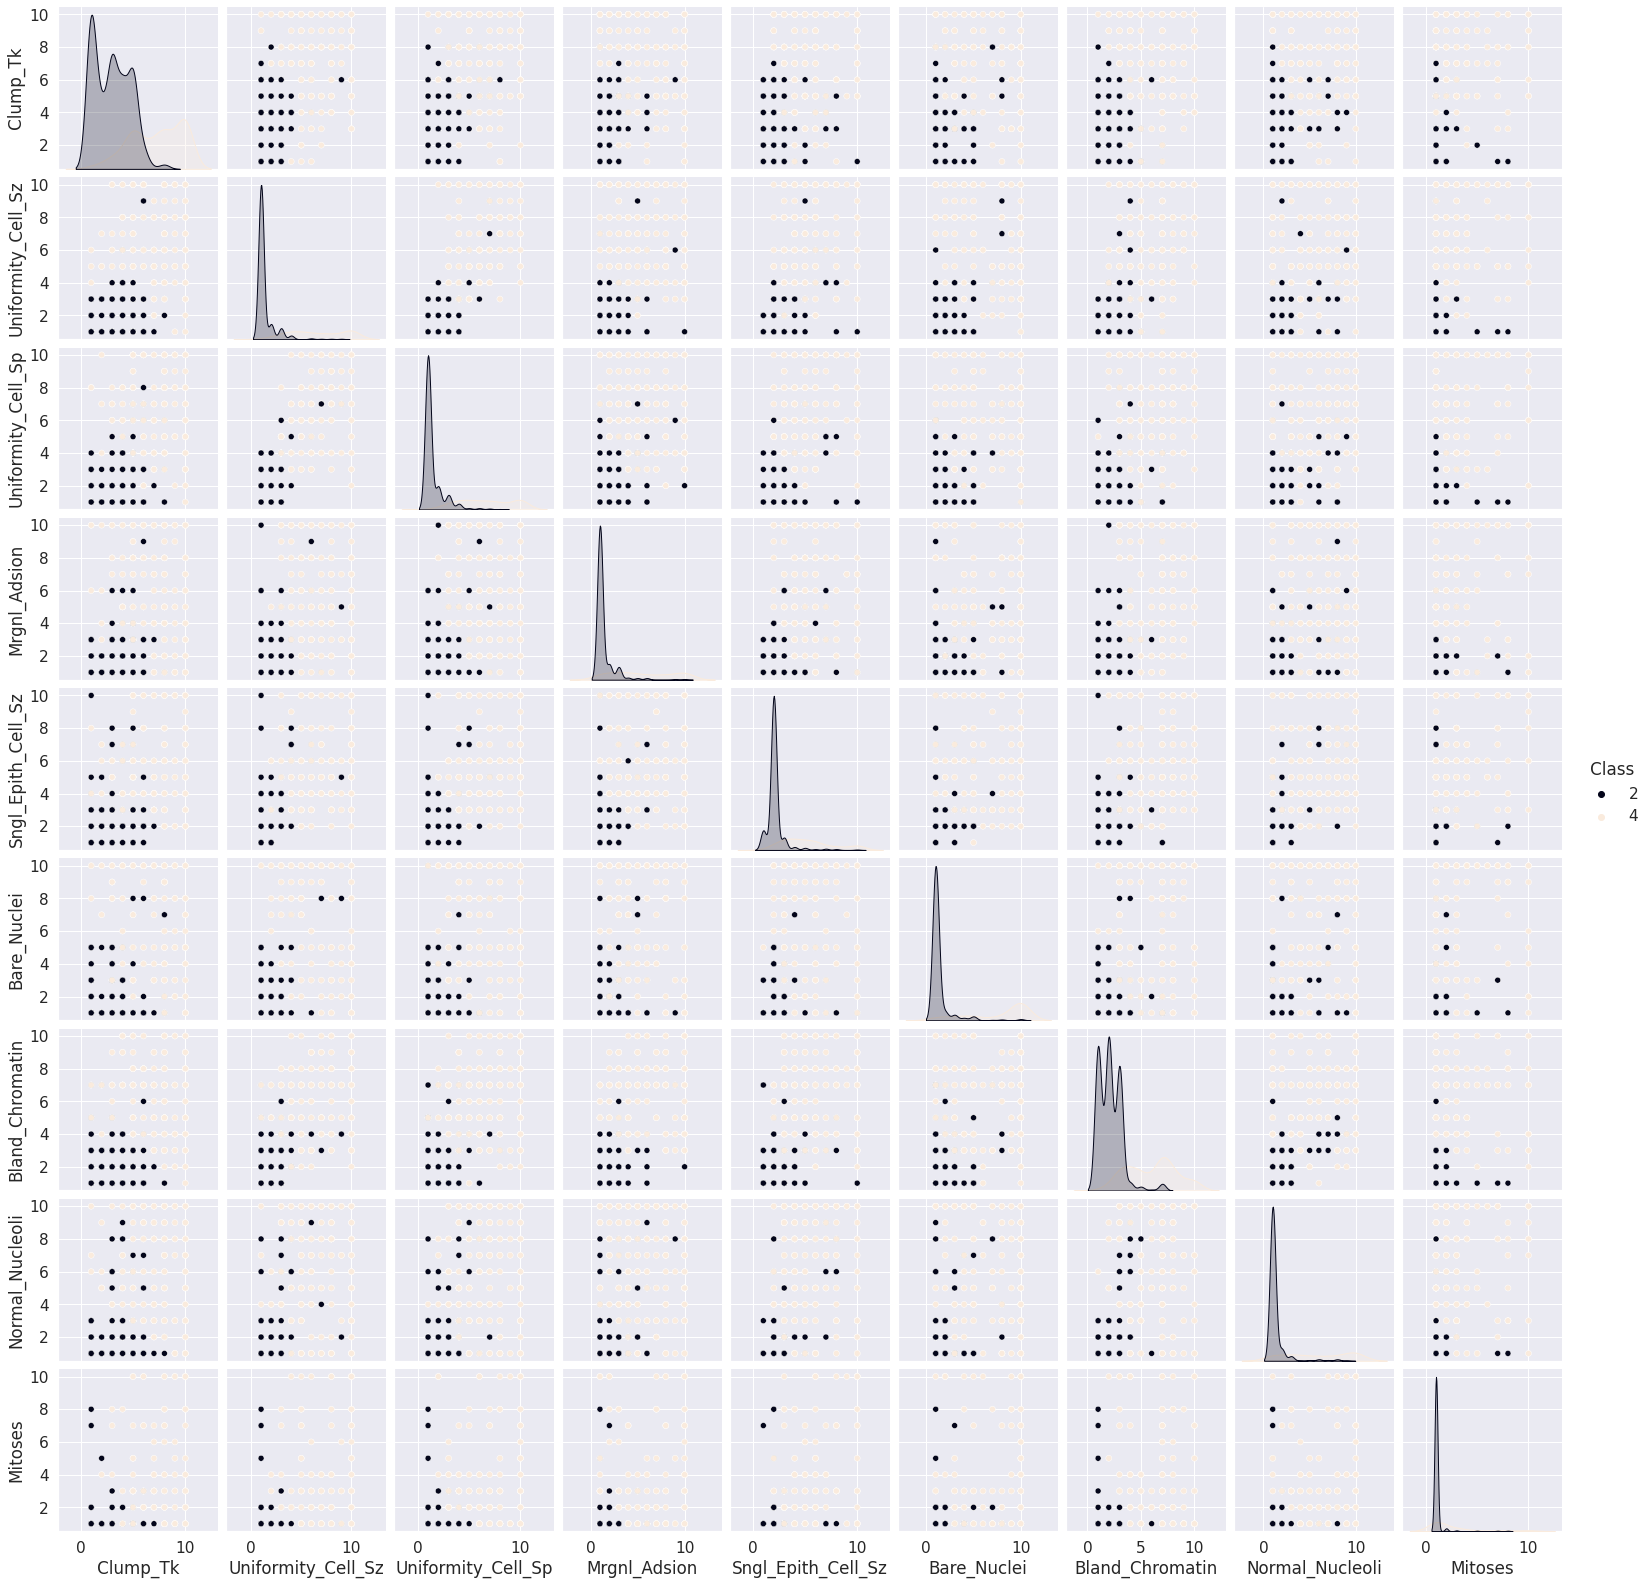

In [0]:
pp_df = upddf.toPandas()
columns = ['Clump_Tk', 'Uniformity_Cell_Sz', 'Uniformity_Cell_Sp', 'Mrgnl_Adsion', 'Sngl_Epith_Cell_Sz', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

sns.pairplot(data=pp_df[columns],hue='Class', palette='rocket')

## CORRELATION ANALYSIS - WHOLE DATA(IT HAS OUTLIERS AS WELL)##

**The correlation analysis below suggests that there is a correlation between Uniformity_Cell_Sz, Uniformity_Cell_Sp and Bare_Nuclei(Bland_Chromatin to an extent) with Class**

In [0]:
# **************************************************************************#
# FOR HEAT MAP FLEXIBILITY WAS MORE WITH SEABORN HENCE USED SEA BORN
# LIBRARY AND STYLE BACKGROUND INSTEAD OF DATABRICS INBUILT VISUALIZATION
# FUNCTIONALITY
# **************************************************************************#


new_df = upddf.select(*df.columns[1:11])
new_df.show()
Vector_Col = "corr-features"
assembler = VectorAssembler(inputCols=new_df.columns, outputCol=Vector_Col)
df_vector = assembler.transform(new_df).select(Vector_Col)
matrix = Correlation.corr(df_vector, Vector_Col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

df_corr = spark.createDataFrame(corrmatrix, new_df.columns)
#Converted the data type to float to reduce the data precision.
df_corr = df_corr.selectExpr("cast(Clump_Tk as float) Clump_Tk",
                             "cast(Uniformity_Cell_Sz as float) Uniformity_Cell_Sz",
                             "cast(Uniformity_Cell_Sp as float) Uniformity_Cell_Sp",
                             "cast(Mrgnl_Adsion as float) Mrgnl_Adsion",
                             "cast(Sngl_Epith_Cell_Sz as float) Sngl_Epith_Cell_Sz",
                             "cast(Bare_Nuclei as float) Bare_Nuclei",
                             "cast(Bland_Chromatin as float) Bland_Chromatin",
                             "cast(Normal_Nucleoli as float) Normal_Nucleoli",
                             "cast(Mitoses as float) Mitoses",
                             "cast(Class as float) Class")

numeric_variables = ['Clump_Tk', 'Uniformity_Cell_Sz', 'Uniformity_Cell_Sp', 'Mrgnl_Adsion', 'Sngl_Epith_Cell_Sz', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
corr_matrix_df = pd.DataFrame(data=corrmatrix, columns = numeric_variables, index=numeric_variables)
corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(5)

+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|Clump_Tk|Uniformity_Cell_Sz|Uniformity_Cell_Sp|Mrgnl_Adsion|Sngl_Epith_Cell_Sz|Bare_Nuclei|Bland_Chromatin|Normal_Nucleoli|Mitoses|Class|
+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|       5|                 1|                 1|           1|                 2|          1|              3|              1|      1|    2|
|       5|                 4|                 4|           5|                 7|         10|              3|              2|      1|    2|
|       3|                 1|                 1|           1|                 2|          2|              3|              1|      1|    2|
|       6|                 8|                 8|           1|                 3|          4|              3|              7|      1|    2|
|       4|                 

Clump_Tk 
 Uniformity_Cell_Sz 
 Uniformity_Cell_Sp 
 Mrgnl_Adsion 
 Sngl_Epith_Cell_Sz 
 Bare_Nuclei 
 Bland_Chromatin 
 Normal_Nucleoli 
 Mitoses 
 Class 
 
 
 
 
 Clump_Tk 
 1.00000 
 0.64491 
 0.65459 
 0.48636 
 0.52182 
 0.59001 
 0.55843 
 0.53583 
 0.35003 
 0.71600 
 
 
 Uniformity_Cell_Sz 
 0.64491 
 1.00000 
 0.90688 
 0.70558 
 0.75180 
 0.68667 
 0.75572 
 0.72286 
 0.45869 
 0.81790 
 
 
 Uniformity_Cell_Sp 
 0.65459 
 0.90688 
 1.00000 
 0.68308 
 0.71967 
 0.70747 
 0.73595 
 0.71945 
 0.43891 
 0.81893 
 
 
 Mrgnl_Adsion 
 0.48636 
 0.70558 
 0.68308 
 1.00000 
 0.59960 
 0.66697 
 0.66672 
 0.60335 
 0.41763 
 0.69680 
 
 
 Sngl_Epith_Cell_Sz 
 0.52182 
 0.75180 
 0.71967 
 0.59960 
 1.00000 
 0.58370 
 0.61610 
 0.62888 
 0.47910 
 0.68278 
 
 
 Bare_Nuclei 
 0.59001 
 0.68667 
 0.70747 
 0.66697 
 0.58370 
 1.00000 
 0.67421 
 0.57478 
 0.34240 
 0.81897 
 
 
 Bland_Chromatin 
 0.55843 
 0.75572 
 0.73595 
 0.66672 
 0.61610 
 0.67421 
 1.00000 
 0.66588 
 0.34417 
 0.75662 
 
 
 Normal_Nucleoli 
 0.53583 
 0.72286 
 0.71945 
 0.60335 
 0.62888 
 0.57478 
 0.66588 
 1.00000 
 0.42834 
 0.71224 
 
 
 Mitoses 
 0.35003 
 0.45869 
 0.43891 
 0.41763 
 0.47910 
 0.34240 
 0.34417 
 0.42834 
 1.00000 
 0.42317 
 
 
 Class 
 0.71600 
 0.81790 
 0.81893 
 0.69680 
 0.68278 
 0.81897 
 0.75662 
 0.71224 
 0.42317 
 1.00000

Out[72]: <AxesSubplot:>

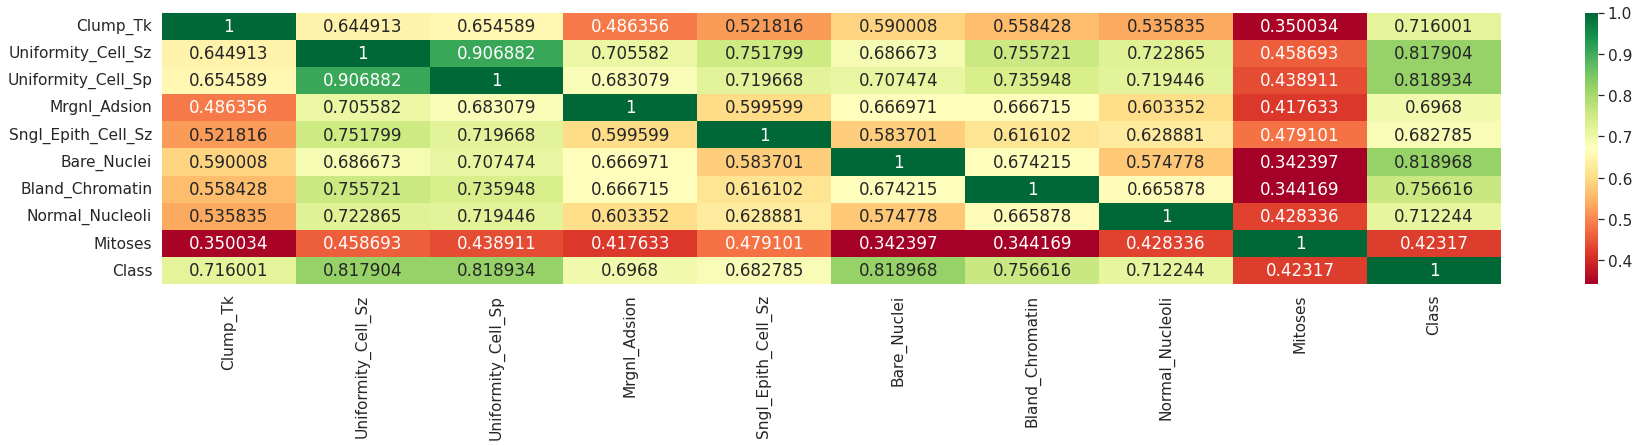

In [0]:
plt.figure(figsize=(30,5))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values, 
            yticklabels=corr_matrix_df.columns.values,  cmap="RdYlGn", annot=True, fmt = 'g')

###OUTLIER ANALYSIS - IQR(Interquartile Range) METHOD USED FOR NORMALIZATION

In [0]:
def fnd_outlrs(df):

    # Considering only these columns for outlier analysis 
    # 'Clump_Tk', 'Uniformity_Cell_Sz', 'Uniformity_Cell_Sp', 'Mrgnl_Adsion', 'Sngl_Epith_Cell_Sz', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'
    
    updf = df.select(*df.columns[1:10])
    
    # For loop to identify the outliers for each feature and create new columns for ouliers
    
    for column in updf.columns:
        
        # QTR1 : First Quartile ., QTR3 : Third Quartile
        
        QTR1 = df.approxQuantile(column,[0.25],relativeError=0)
        QTR3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        
        # IQR : Inter Quantile Range

        IQR = QTR3[0] - QTR1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        QTR1_ls =  QTR1[0] - 1.5*IQR
        QTR3_mr =  QTR3[0] + 1.5*IQR
        
        #isOutlierCol = 'is_outlier_{}'.format(column)
        OutlrCol = 'outlier_{}'.format(column)
        
        df = df.withColumn(OutlrCol,F.when((df[column] > QTR3_mr) | (df[column] < QTR1_ls), 1).otherwise(0))
        

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("outlier")]

    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('Outlrs_Count',sum(df[column] for column in selected_columns))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("outlier")])

    return df

In [0]:
#BELOW FINDS THE OUTLIERS AND ADDS COLUMN TO DATAFRAME
fin_df = fnd_outlrs(upddf)

print('*******************************************************************')
print('********************DATAFRAME WITH OUTLIERS************************')
print('*******************************************************************')
fin_df.show()

print('**********************************************************************')
print("DATFRAME WITH OUTLIERS COUNT",fin_df.count())
print('**********************************************************************')

#BELOW FILTERS ONLY ROWS WITH OUTLIERS LESS THAN EQUAL TO 1
fin_df_no_outliers = fin_df.filter(fin_df['Outlrs_Count']<=1)

#SAVED final_df_no_outliers for later use
final_df_no_outliers = fin_df_no_outliers

print('**********************************************************************')
print('********************DATAFRAME WITHOUT OUTLIERS************************')
print('**********************************************************************')

final_df_no_outliers.show()

#PICKING WRK DF FOR fin_df_no_outliers CONTAINS ONLY FEATURE COLUMS
fin_df_no_outliers_wrk = fin_df_no_outliers.select(*feat.columns)
fin_df_no_outliers_feat = fin_df_no_outliers.select(*fin_df.columns[1:10])

print('**********************************************************************')
print("DATFRAME WITHOUT OUTLIERS COUNT",final_df_no_outliers.count())
print('**********************************************************************')
#fin_df_no_outliers_wrk.show()

#PICKING WRK DF FOR fin_df_with_outliers CONTAINS ONLY FEATURE COLUMS
fin_df_with_outliers_wrk = fin_df.filter(fin_df['Outlrs_Count']>=2)
#fin_df_with_outliers_wrk.show()

#FIN_DF HAS ALL COLUMNS IN IT(IT INCLUDES INFO OF UPDDF AND OUTLIER INFO AS WELL)
#FEAT_DF HAS ONLY FEATURE COLUMNS EXTRACTED FROM IT
feat_df = fin_df.select(*fin_df.columns[1:10])

#original_df HAS ONLY FEATURE COLUMNS FROM fin_df CONVERTED TO PANDAS DATAFRAME TO BE USEFUL FOR GRAPH PLOTTING
original_df = feat_df.toPandas()
#ds_withno_outliers HAS ONLY FEATURE COLUMNS FROM fin_df CONVERTED TO PANDAS DATAFRAME TO BE USEFUL FOR GRAPH PLOTTING
ds_withno_outliers = fin_df_no_outliers_wrk.toPandas()

*******************************************************************
********************DATAFRAME WITH OUTLIERS************************
*******************************************************************
+-------+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+------------+
|    SNo|Clump_Tk|Uniformity_Cell_Sz|Uniformity_Cell_Sp|Mrgnl_Adsion|Sngl_Epith_Cell_Sz|Bare_Nuclei|Bland_Chromatin|Normal_Nucleoli|Mitoses|Class|Outlrs_Count|
+-------+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+------------+
|1000025|       5|                 1|                 1|           1|                 2|          1|              3|              1|      1|    2|           0|
|1002945|       5|                 4|                 4|           5|                 7|         10|              3|              2|      1|    2|          

#### The correlation analysis below suggests that there is a high correlation between Uniformity_Cell_Sz, Uniformity_Cell_Sp and Bare_Nuclei(Bland_Chromatin to an extent) with Class(Benign/Malignant)

In [0]:
# **************************************************************************#
# FOR HEAT MAP FLEXIBILITY WAS MORE WITH SEABORN HENCE USED SEA BORN
# LIBRARY AND STYLE BACKGROUND INSTEAD OF DATABRICS INBUILT VISUALIZATION
# FUNCTIONALITY
# **************************************************************************#

#new_df = df.na.fill(value=1, subset=["Bare_Nuclei"])
#Considered only columns skipping Sample Code Number(SNo) Column
#new_df = new_df.select(*df.columns[1:11])
#new_df.show()

new_df = final_df_no_outliers.select(*df.columns[1:11])
new_df.show()
Vector_Col = "corr-features"
assembler = VectorAssembler(inputCols=new_df.columns, outputCol=Vector_Col)
df_vector = assembler.transform(new_df).select(Vector_Col)
matrix = Correlation.corr(df_vector, Vector_Col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

df_corr = spark.createDataFrame(corrmatrix, new_df.columns)
#Converted the data type to float to reduce the data precision.
df_corr = df_corr.selectExpr("cast(Clump_Tk as float) Clump_Tk",
                             "cast(Uniformity_Cell_Sz as float) Uniformity_Cell_Sz",
                             "cast(Uniformity_Cell_Sp as float) Uniformity_Cell_Sp",
                             "cast(Mrgnl_Adsion as float) Mrgnl_Adsion",
                             "cast(Sngl_Epith_Cell_Sz as float) Sngl_Epith_Cell_Sz",
                             "cast(Bare_Nuclei as float) Bare_Nuclei",
                             "cast(Bland_Chromatin as float) Bland_Chromatin",
                             "cast(Normal_Nucleoli as float) Normal_Nucleoli",
                             "cast(Mitoses as float) Mitoses",
                             "cast(Class as float) Class")

numeric_variables = ['Clump_Tk', 'Uniformity_Cell_Sz', 'Uniformity_Cell_Sp', 'Mrgnl_Adsion', 'Sngl_Epith_Cell_Sz', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
corr_matrix_df = pd.DataFrame(data=corrmatrix, columns = numeric_variables, index=numeric_variables)
corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(5)

+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|Clump_Tk|Uniformity_Cell_Sz|Uniformity_Cell_Sp|Mrgnl_Adsion|Sngl_Epith_Cell_Sz|Bare_Nuclei|Bland_Chromatin|Normal_Nucleoli|Mitoses|Class|
+--------+------------------+------------------+------------+------------------+-----------+---------------+---------------+-------+-----+
|       5|                 1|                 1|           1|                 2|          1|              3|              1|      1|    2|
|       5|                 4|                 4|           5|                 7|         10|              3|              2|      1|    2|
|       3|                 1|                 1|           1|                 2|          2|              3|              1|      1|    2|
|       6|                 8|                 8|           1|                 3|          4|              3|              7|      1|    2|
|       4|                 

Clump_Tk 
 Uniformity_Cell_Sz 
 Uniformity_Cell_Sp 
 Mrgnl_Adsion 
 Sngl_Epith_Cell_Sz 
 Bare_Nuclei 
 Bland_Chromatin 
 Normal_Nucleoli 
 Mitoses 
 Class 
 
 
 
 
 Clump_Tk 
 1.00000 
 0.62260 
 0.63738 
 0.42652 
 0.48240 
 0.57169 
 0.50736 
 0.48830 
 0.22558 
 0.68155 
 
 
 Uniformity_Cell_Sz 
 0.62260 
 1.00000 
 0.89691 
 0.64656 
 0.67559 
 0.68213 
 0.71528 
 0.66700 
 0.19114 
 0.79058 
 
 
 Uniformity_Cell_Sp 
 0.63738 
 0.89691 
 1.00000 
 0.62553 
 0.66031 
 0.68788 
 0.69712 
 0.64554 
 0.16206 
 0.79937 
 
 
 Mrgnl_Adsion 
 0.42652 
 0.64656 
 0.62553 
 1.00000 
 0.53421 
 0.62615 
 0.59861 
 0.55413 
 0.10506 
 0.64691 
 
 
 Sngl_Epith_Cell_Sz 
 0.48240 
 0.67559 
 0.66031 
 0.53421 
 1.00000 
 0.57704 
 0.55401 
 0.51045 
 0.10462 
 0.61864 
 
 
 Bare_Nuclei 
 0.57169 
 0.68213 
 0.68788 
 0.62615 
 0.57704 
 1.00000 
 0.65566 
 0.52802 
 0.18421 
 0.81492 
 
 
 Bland_Chromatin 
 0.50736 
 0.71528 
 0.69712 
 0.59861 
 0.55401 
 0.65566 
 1.00000 
 0.62910 
 0.16758 
 0.72807 
 
 
 Normal_Nucleoli 
 0.48830 
 0.66700 
 0.64554 
 0.55413 
 0.51045 
 0.52802 
 0.62910 
 1.00000 
 0.15088 
 0.65422 
 
 
 Mitoses 
 0.22558 
 0.19114 
 0.16206 
 0.10506 
 0.10462 
 0.18421 
 0.16758 
 0.15088 
 1.00000 
 0.26439 
 
 
 Class 
 0.68155 
 0.79058 
 0.79937 
 0.64691 
 0.61864 
 0.81492 
 0.72807 
 0.65422 
 0.26439 
 1.00000

## SKEWNESS ANALYSIS ##

**INFERENCE: ALL COLUMNS ARE POSITVELY SKEWED**

In [0]:
#feat = upddf.select(*df.columns[1:10])


print("********************************************") 
print("********SKEWNESS IN ORIGINAL DATA***********") 
print("********************************************") 

for i in feat.columns:
    feat.select(F.skewness(i)).show()
    
print("********************************************") 
print("****SKEWNESS IN DATA WITH NO OUTLIERS*******") 
print("********************************************") 

for i in fin_df_no_outliers_feat.columns:
    fin_df_no_outliers_feat.select(F.skewness(i)).show()

********************************************
********SKEWNESS IN ORIGINAL DATA***********
********************************************
+------------------+
|skewness(Clump_Tk)|
+------------------+
| 0.591585544952738|
+------------------+

+----------------------------+
|skewness(Uniformity_Cell_Sz)|
+----------------------------+
|          1.2304887632087609|
+----------------------------+

+----------------------------+
|skewness(Uniformity_Cell_Sp)|
+----------------------------+
|          1.1593644316595673|
+----------------------------+

+----------------------+
|skewness(Mrgnl_Adsion)|
+----------------------+
|    1.5211947480443033|
+----------------------+

+----------------------------+
|skewness(Sngl_Epith_Cell_Sz)|
+----------------------------+
|          1.7084954210452952|
+----------------------------+

+---------------------+
|skewness(Bare_Nuclei)|
+---------------------+
|   1.0231456656289737|
+---------------------+

+-------------------------+
|skewness(Bland_

### STATS CALCULATED BELOW TO CONFIRM SKEWNESS ANALYSIS ###

**INFERENCE: ALL COLUMNS ARE POSITVELY SKEWED**

In [0]:
for i in feat.columns:
    print("********************************************") 
    print("*MEAN MEDIAN MODE FOR ORIGINAL DATA*") 
    print("********************************************") 
    print("Stats for Column", i)
    mean_hp = feat.agg(mean(i).alias('mean_hp')).collect()[0]['mean_hp']
    print("Mean is ", mean_hp)
    print("Median is ", feat.approxQuantile(i,[0.50],0.01))
    print(i," mode is" , feat.groupby(i).count().orderBy("count", ascending=False).first()[0])
    print("********************************************")

for i in fin_df_no_outliers_feat.columns:
    print("********************************************") 
    print("*MEAN MEDIAN MODE FOR DATA WITH NO OUTLIERS*") 
    print("********************************************") 
    print("Stats for Column", i)
    mean_hp = fin_df_no_outliers_feat.agg(mean(i).alias('mean_hp')).collect()[0]['mean_hp']
    print("Mean is ", mean_hp)
    print("Median is ", fin_df_no_outliers_feat.approxQuantile(i,[0.50],0.01))
    print(i," mode is" , fin_df_no_outliers_feat.groupby(i).count().orderBy("count", ascending=False).first()[0])
    print("********************************************")  


********************************************
*MEAN MEDIAN MODE FOR ORIGINAL DATA*
********************************************
Stats for Column Clump_Tk
Mean is  4.417739628040057
Median is  [4.0]
Clump_Tk  mode is 1
********************************************
********************************************
*MEAN MEDIAN MODE FOR ORIGINAL DATA*
********************************************
Stats for Column Uniformity_Cell_Sz
Mean is  3.13447782546495
Median is  [1.0]
Uniformity_Cell_Sz  mode is 1
********************************************
********************************************
*MEAN MEDIAN MODE FOR ORIGINAL DATA*
********************************************
Stats for Column Uniformity_Cell_Sp
Mean is  3.207439198855508
Median is  [1.0]
Uniformity_Cell_Sp  mode is 1
********************************************
********************************************
*MEAN MEDIAN MODE FOR ORIGINAL DATA*
********************************************
Stats for Column Mrgnl_Adsion
Mean is  2.8068669

### NORMALIZATION - NORMALIZED DATASET IS CREATED HERE

In [0]:
from functools import reduce

upd_df = final_df_no_outliers


_schema = copy.deepcopy(upd_df.schema)
ND1 = upd_df.rdd.zipWithIndex().toDF(_schema)

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),3), DoubleType())

columns_to_scale = upd_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses")

for i in columns_to_scale.columns:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    upd_df = pipeline.fit(upd_df).transform(upd_df).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")


nd_upd_df=(upd_df.select("SNo","Clump_Tk_scaled", "Uniformity_Cell_Sz_scaled", "Uniformity_Cell_Sp_scaled", "Mrgnl_Adsion_scaled", "Sngl_Epith_Cell_Sz_scaled", "Bare_Nuclei_scaled", "Bland_Chromatin_scaled", "Normal_Nucleoli_scaled", "Mitoses_scaled","Class"))

oldColumns = nd_upd_df.schema.names
newColumns = ["SNo","Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses","Class"]

nd_upd_df = reduce(lambda nd_upd_df, idx: nd_upd_df.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), nd_upd_df)
nd_upd_df.printSchema()
nd_upd_df.count()

root
 |-- SNo: integer (nullable = true)
 |-- Clump_Tk: double (nullable = true)
 |-- Uniformity_Cell_Sz: double (nullable = true)
 |-- Uniformity_Cell_Sp: double (nullable = true)
 |-- Mrgnl_Adsion: double (nullable = true)
 |-- Sngl_Epith_Cell_Sz: double (nullable = true)
 |-- Bare_Nuclei: double (nullable = true)
 |-- Bland_Chromatin: double (nullable = true)
 |-- Normal_Nucleoli: double (nullable = true)
 |-- Mitoses: double (nullable = true)
 |-- Class: integer (nullable = true)

Out[78]: 611

#### STATS WITH FOR ONLY FEATURES FOR DATASET STANDARDIZED(NULLS REMOVED)

In [0]:
display(feat)

Clump_Tk Uniformity_Cell_Sz Uniformity_Cell_Sp Mrgnl_Adsion Sngl_Epith_Cell_Sz Bare_Nuclei Bland_Chromatin Normal_Nucleoli Mitoses 5 1 1 1 2 1 3 1 1 5 4 4 5 7 10 3 2 1 3 1 1 1 2 2 3 1 1 6 8 8 1 3 4 3 7 1 4 1 1 3 2 1 3 1 1 8 10 10 8 7 10 9 7 1 1 1 1 1 2 10 3 1 1 2 1 2 1 2 1 3 1 1 2 1 1 1 2 1 1 1 5 4 2 1 1 2 1 2 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 2 1 2 1 1 5 3 3 3 2 3 4 4 1 1 1 1 1 2 3 3 1 1 8 7 5 10 7 9 5 5 4 7 4 6 4 6 1 4 3 1 4 1 1 1 2 1 2 1 1 4 1 1 1 2 1 3 1 1 10 7 7 6 4 10 4 1 2 6 1 1 1 2 1 3 1 1 7 3 2 10 5 10 5 4 4 10 5 5 3 6 7 7 10 1 3 1 1 1 2 1 2 1 1 8 4 5 1 2 1 7 3 1 1 1 1 1 2 1 3 1 1 5 2 3 4 2 7 3 6 1 3 2 1 1 1 1 2 1 1 5 1 1 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 3 1 2 1 1 1 1 3 1 1 1 1 1 2 1 1 2 1 1 1 2 1 3 1 1 10 7 7 3 8 5 7 4 3 2 1 1 2 2 1 3 1 1 3 1 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 10 10 10 8 6 1 8 9 1 6 2 1 1 1 1 7 1 1 5 4 4 9 2 10 5 6 1 2 5 3 3 6 7 7 5 1 6 6 6 9 6 1 7 8 1 10 4 3 1 3 3 6 5 2 6 10 10 2 8 10 7 3 3 5 6 5 6 10 1 3 1 1 10 10 10 4 8 1 8 10 1 1 1 1 1 2 1 2 1 2 3 7 7 4 4 9 4 8 1 1 1 1 1 2 1 2 1 1 4 1 1 3 2 1 3 1 1 7 8 7 2 4 8 3 8 2 9 5 8 1 2 3 2 1 5 5 3 3 4 2 4 3 4 1 10 3 6 2 3 5 4 10 2 5 5 5 8 10 8 7 3 7 10 5 5 6 8 8 7 1 1 10 6 6 3 4 5 3 6 1 8 10 10 1 3 6 3 9 1 8 2 4 1 5 1 5 4 4 5 2 3 1 6 10 5 1 1 9 5 5 2 2 2 5 1 1 5 3 5 5 3 3 4 10 1 1 1 1 1 2 2 2 1 1 9 10 10 1 10 8 3 3 1 6 3 4 1 5 2 3 9 1 1 1 1 1 2 1 2 1 1 10 4 2 1 3 2 4 3 10 4 1 1 1 2 1 3 1 1 5 3 4 1 8 10 4 9 1 8 3 8 3 4 9 8 9 8 1 1 1 1 2 1 3 2 1 5 1 3 1 2 1 2 1 1 6 10 2 8 10 2 7 8 10 1 3 3 2 2 1 7 2 1 9 4 5 10 6 10 4 8 1 10 6 4 1 3 4 3 2 3 1 1 2 1 2 2 4 2 1 1 1 4 1 2 1 2 1 1 5 3 1 2 2 1 2 1 1 3 1 1 1 2 3 3 1 1 2 1 1 1 3 1 2 1 1 2 2 2 1 1 1 7 1 1 4 1 1 2 2 1 2 1 1 5 2 1 1 2 1 3 1 1 3 1 1 1 2 2 7 1 1 3 5 7 8 8 9 7 10 7 5 10 6 1 10 4 4 10 10 3 3 6 4 5 8 4 4 1 3 6 6 6 5 10 6 8 3 4 1 1 1 2 1 3 1 1 2 1 1 2 3 1 2 1 1 1 1 1 1 2 1 3 1 1 3 1 1 2 2 1 1 1 1 4 1 1 1 2 1 3 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 2 1 3 1 1 2 1 1 2 2 1 1 1 1 5 1 1 1 2 1 3 1 1 9 6 9 2 10 6 2 9 10 7 5 6 10 5 10 7 9 4 10 3 5 1 10 5 3 10 2 2 3 4 4 2 5 2 5 1 4 1 2 1 2 1 3 1 1 8 2 3 1 6 3 7 1 1 10 10 10 10 10 1 8 8 8 7 3 4 4 3 3 3 2 7 10 10 10 8 2 10 4 1 1 1 6 8 10 8 10 5 7 1 1 1 1 1 2 1 2 3 1 6 5 4 4 3 9 7 8 3 1 3 1 2 2 2 5 3 2 8 6 4 3 5 9 3 1 1 10 3 3 10 2 10 7 3 3 10 10 10 3 10 8 8 1 1 3 3 2 1 2 3 3 1 1 1 1 1 1 2 5 1 1 1 8 3 3 1 2 2 3 2 1 4 5 5 10 4 10 7 5 8 1 1 1 1 4 3 1 1 1 3 2 1 1 2 2 3 1 1 1 1 2 2 2 1 3 1 1 4 2 1 1 2 2 3 1 1 10 10 10 2 10 10 5 3 3 5 3 5 1 8 10 5 3 1 5 4 6 7 9 7 8 10 1 1 1 1 1 2 1 2 1 1 7 5 3 7 4 10 7 5 5 3 1 1 1 2 1 3 1 1 8 3 5 4 5 10 1 6 2 1 1 1 1 10 1 1 1 1 5 1 3 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 5 10 8 10 8 10 3 6 3 3 1 1 1 2 1 2 2 1 3 1 1 1 3 1 2 1 1 5 1 1 1 2 2 3 3 1 4 1 1 1 2 1 2 1 1 3 1 1 1 2 1 1 1 1 4 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 9 5 5 4 4 5 4 3 3 1 1 1 1 2 5 1 1 1 2 1 1 1 2 1 2 1 1 1 1 3 1 2 1 2 1 1 3 4 5 2 6 8 4 1 1 1 1 1 1 3 2 2 1 1 3 1 1 3 8 1 5 8 1 8 8 7 4 10 10 7 8 7 1 1 1 1 1 1 3 1 1 7 2 4 1 6 10 5 4 3 10 10 8 6 4 5 8 10 1 4 1 1 1 2 3 1 1 1 1 1 1 1 2 1 1 1 1 5 5 5 6 3 10 3 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 1 1 2 1 3 1 1 1 1 9 9 10 3 6 10 7 10 6 10 7 7 4 5 10 5 7 2 4 1 1 1 2 1 3 2 1 3 1 1 1 2 1 3 1 1 1 1 1 2 1 3 1 1 7 5 1 1 1 2 1 3 1 1 4 1 1 1 2 2 3 2 1 5 6 7 8 8 10 3 10 3 10 8 10 10 6 1 3 1 10 3 1 1 1 2 1 3 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 2 1 2 1 1 6 10 10 10 8 10 10 10 7 8 6 5 4 3 10 6 1 1 5 8 7 7 10 10 5 7 1 2 1 1 1 2 1 3 1 1 5 10 10 3 8 1 5 10 3 4 1 1 1 2 1 3 1 1 5 3 3 3 6 10 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 6 1 1 1 2 1 3 1 1 5 8 8 8 5 10 7 8 1 8 7 6 4 4 10 5 1 1 2 1 1 1 1 1 3 1 1 1 5 8 6 5 8 7 10 1 10 5 6 10 6 10 7 7 10 5 8 4 10 5 8 9 10 1 1 2 3 1 2 1 3 1 1 10 10 10 8 6 8 7 10 1 7 5 10 10 10 10 4 10 3 5 1 1 1 2 1 2 1 1 1 1 1 1 2 1 3 1 1 3 1 1 1 2 1 3 1 1 4 1 1 1 2 1 3 1 1 8 4 4 5 4 7 7 8 2 5 1 1 4 2 1 3 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 2 1 2 1 1 9 7 7 5 5 10 7 8 3 10 8 8 4 10 10 8 1 1 1 1 1 1 2 1 3 1 1 5 1 1 1 2 1 3 1 1 1 1 1 1 2 1 3 1 1 5 10 10 9 6 10 7 10 5 10 10 9 3 7

Output can only be rendered in Databricks

#### STATS WITH FOR ONLY FEATURES FOR NO OUTLIER DATASET

In [0]:
display(fin_df_no_outliers_feat)

Clump_Tk Uniformity_Cell_Sz Uniformity_Cell_Sp Mrgnl_Adsion Sngl_Epith_Cell_Sz Bare_Nuclei Bland_Chromatin Normal_Nucleoli Mitoses 5 1 1 1 2 1 3 1 1 5 4 4 5 7 10 3 2 1 3 1 1 1 2 2 3 1 1 6 8 8 1 3 4 3 7 1 4 1 1 3 2 1 3 1 1 8 10 10 8 7 10 9 7 1 1 1 1 1 2 10 3 1 1 2 1 2 1 2 1 3 1 1 2 1 1 1 2 1 1 1 5 4 2 1 1 2 1 2 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 2 1 2 1 1 5 3 3 3 2 3 4 4 1 1 1 1 1 2 3 3 1 1 7 4 6 4 6 1 4 3 1 4 1 1 1 2 1 2 1 1 4 1 1 1 2 1 3 1 1 10 7 7 6 4 10 4 1 2 6 1 1 1 2 1 3 1 1 10 5 5 3 6 7 7 10 1 3 1 1 1 2 1 2 1 1 8 4 5 1 2 1 7 3 1 1 1 1 1 2 1 3 1 1 5 2 3 4 2 7 3 6 1 3 2 1 1 1 1 2 1 1 5 1 1 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 3 1 2 1 1 1 1 3 1 1 1 1 1 2 1 1 2 1 1 1 2 1 3 1 1 2 1 1 2 2 1 3 1 1 3 1 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 10 10 10 8 6 1 8 9 1 6 2 1 1 1 1 7 1 1 5 4 4 9 2 10 5 6 1 2 5 3 3 6 7 7 5 1 6 6 6 9 6 1 7 8 1 10 4 3 1 3 3 6 5 2 5 6 5 6 10 1 3 1 1 1 1 1 1 2 1 2 1 2 3 7 7 4 4 9 4 8 1 1 1 1 1 2 1 2 1 1 4 1 1 3 2 1 3 1 1 7 8 7 2 4 8 3 8 2 9 5 8 1 2 3 2 1 5 5 3 3 4 2 4 3 4 1 10 5 5 6 8 8 7 1 1 10 6 6 3 4 5 3 6 1 8 10 10 1 3 6 3 9 1 8 2 4 1 5 1 5 4 4 5 2 3 1 6 10 5 1 1 9 5 5 2 2 2 5 1 1 5 3 5 5 3 3 4 10 1 1 1 1 1 2 2 2 1 1 9 10 10 1 10 8 3 3 1 6 3 4 1 5 2 3 9 1 1 1 1 1 2 1 2 1 1 10 4 2 1 3 2 4 3 10 4 1 1 1 2 1 3 1 1 1 1 1 1 2 1 3 2 1 5 1 3 1 2 1 2 1 1 1 3 3 2 2 1 7 2 1 9 4 5 10 6 10 4 8 1 10 6 4 1 3 4 3 2 3 1 1 2 1 2 2 4 2 1 1 1 4 1 2 1 2 1 1 5 3 1 2 2 1 2 1 1 3 1 1 1 2 3 3 1 1 2 1 1 1 3 1 2 1 1 2 2 2 1 1 1 7 1 1 4 1 1 2 2 1 2 1 1 5 2 1 1 2 1 3 1 1 3 1 1 1 2 2 7 1 1 3 3 6 4 5 8 4 4 1 3 6 6 6 5 10 6 8 3 4 1 1 1 2 1 3 1 1 2 1 1 2 3 1 2 1 1 1 1 1 1 2 1 3 1 1 3 1 1 2 2 1 1 1 1 4 1 1 1 2 1 3 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 2 1 3 1 1 2 1 1 2 2 1 1 1 1 5 1 1 1 2 1 3 1 1 2 3 4 4 2 5 2 5 1 4 1 2 1 2 1 3 1 1 8 2 3 1 6 3 7 1 1 7 3 4 4 3 3 3 2 7 10 10 10 8 2 10 4 1 1 1 1 1 1 2 1 2 3 1 6 5 4 4 3 9 7 8 3 1 3 1 2 2 2 5 3 2 8 6 4 3 5 9 3 1 1 10 10 10 3 10 8 8 1 1 3 3 2 1 2 3 3 1 1 1 1 1 1 2 5 1 1 1 8 3 3 1 2 2 3 2 1 1 1 1 1 4 3 1 1 1 3 2 1 1 2 2 3 1 1 1 1 2 2 2 1 3 1 1 4 2 1 1 2 2 3 1 1 5 3 5 1 8 10 5 3 1 1 1 1 1 2 1 2 1 1 7 5 3 7 4 10 7 5 5 3 1 1 1 2 1 3 1 1 8 3 5 4 5 10 1 6 2 1 1 1 1 10 1 1 1 1 5 1 3 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 3 1 1 1 2 1 2 2 1 3 1 1 1 3 1 2 1 1 5 1 1 1 2 2 3 3 1 4 1 1 1 2 1 2 1 1 3 1 1 1 2 1 1 1 1 4 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 9 5 5 4 4 5 4 3 3 1 1 1 1 2 5 1 1 1 2 1 1 1 2 1 2 1 1 1 1 3 1 2 1 2 1 1 3 4 5 2 6 8 4 1 1 1 1 1 1 3 2 2 1 1 3 1 1 3 8 1 5 8 1 1 1 1 1 1 1 3 1 1 7 2 4 1 6 10 5 4 3 10 10 8 6 4 5 8 10 1 4 1 1 1 2 3 1 1 1 1 1 1 1 2 1 1 1 1 5 5 5 6 3 10 3 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 2 1 3 1 1 1 1 2 1 3 1 1 1 1 10 7 7 4 5 10 5 7 2 4 1 1 1 2 1 3 2 1 3 1 1 1 2 1 3 1 1 1 1 1 2 1 3 1 1 7 5 1 1 1 2 1 3 1 1 4 1 1 1 2 2 3 2 1 3 1 1 1 2 1 3 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 2 1 2 1 1 8 6 5 4 3 10 6 1 1 5 8 7 7 10 10 5 7 1 2 1 1 1 2 1 3 1 1 4 1 1 1 2 1 3 1 1 5 3 3 3 6 10 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 6 1 1 1 2 1 3 1 1 5 8 8 8 5 10 7 8 1 8 7 6 4 4 10 5 1 1 2 1 1 1 1 1 3 1 1 1 5 8 6 5 8 7 10 1 1 2 3 1 2 1 3 1 1 10 10 10 8 6 8 7 10 1 5 1 1 1 2 1 2 1 1 1 1 1 1 2 1 3 1 1 3 1 1 1 2 1 3 1 1 4 1 1 1 2 1 3 1 1 8 4 4 5 4 7 7 8 2 5 1 1 4 2 1 3 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 2 1 2 1 1 9 7 7 5 5 10 7 8 3 10 8 8 4 10 10 8 1 1 1 1 1 1 2 1 3 1 1 5 1 1 1 2 1 3 1 1 1 1 1 1 2 1 3 1 1 10 10 9 3 7 5 3 5 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 5 1 1 1 1 1 3 1 1 8 10 8 8 4 8 7 7 1 1 1 1 1 2 1 3 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 3 1 1 6 1 3 1 2 1 3 1 1 1 1 1 2 2 1 3 1 1 4 1 1 3 1 5 2 1 1 7 5 6 3 3 8 7 4 1 1 1 1 1 2 1 2 1 1 10 5 7 4 4 10 8 9 1 8 9 9 5 3 5 7 7 1 1 1 1 1 1 1 3 1 1 7 4 7 4 3 7 7 6 1 8 4 6 3 3 1 4 3 1 10 4 5 5 5 10 4 1 1 3 3 2 1 3 1 3 6 1 3 1 4 1 2 1 3 1 1 10 4 3 2 3 10 5 3 2 5 1 3 3 2 2 2 3 1 3 1 1 3 1 1 3 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 2 5 5 1 1 1 1 1 1 2 1 3 1 1 5 1 1 2 2 2 3 1 1 8 10 10 8 5 10 7 8 1 8 4 4 1 2 9 3 3 1 4 1 1 1 2 1 3 6 1 3 1 1 1 2 1 3 1 1 1 2 2 1 2 1 1 1 1 6 3 3 5 3 10 3 5 3 9 10 10 1 10 8 3 3 1 5 6 6 2 4 10 3 6 1 3 1 1 1 

Output can only be rendered in Databricks

# BELOW SECTION HANDLES FOLLOWING
### 4. Data Preparation ###

#### Based on Analysis above FOUR datasets can be prepared. 
- **INPUT DATASET WITH ALL FEATURE COLUMNS(WITH EXCEPTION OF SNo-Sample_Code_Number)**
- **INPUT DATASET REDUCED WITH ONLY FEATURES HAVING HIGH CORRELATION**
- **NORMALIZED DATASET WITH ALL FEATURE COLUMNS (WITH EXCEPTION OF SNo-Sample_Code_Number)**
- **NORMALIZED DATASET WITH ONLY FEATURES HAVING HIGH CORRELATION**

#### NORMALIZED DATASET IS A DATASET WHICH IS STANDARDIZED(NULL VALUES REPLACED), OUTLIERS REMOVED, NORMALIZATION DONE USING MIN-MAXSCALER.

### 5. Model Building ###
- #### Models built are Logistic Regression, Naive Bayes, Gradient Boosting Tree, Random Forest
### 6. Performance Evaluation ###
- #### Performance Evaluation using Sklearn, UDF Binary Classification, Binary Classification Evaluator, MultiClassMetrics, Binary Classification Metrics
- #### Performance Evaluation provides following insights Accuracy, Precision, Recall, F1 Score, Sensitivity, Specificity, TP, FP, FN, TN, Confusion Matrix, Area Under ROC, Area Under PR

In [0]:
def bin_class_val(df):

        tp = df[(df.Class == df.prediction) & (df.prediction == 2)].count()
        tn = df[(df.Class == df.prediction) & (df.prediction == 4)].count()
        fp = df[(df.Class != df.prediction) & (df.prediction == 2)].count()
        fn = df[(df.Class != df.prediction) & (df.prediction == 4)].count()
        a = ((tp + tn)/df.count())
        
  
    
        if(tp + fn == 0.0):
            r = 0.0
            p = float(tp) / (tp + fp)
        elif(tp + fp == 0.0):
            r = float(tp) / (tp + fn)
            p = 0.0
        else:
            r = float(tp) / (tp + fn)
            p = float(tp) / (tp + fp)

        if(p + r == 0):
            f1 = 0
        else:
            f1 = 2 * ((p * r)/(p + r))
    
        print("True Positives:", tp)
        print("True Negatives:", tn)
        print("False Positives:", fp)
        print("False Negatives:", fn)
        print("Total:", df.count())
        print("Accuracy:", a)
        print("Recall:", r)
        print("Precision: ", p)
        print("F1 score:", f1)
#        print('AUC:', BCM(df['Class_d','prediction'].rdd).areaUnderROC)
print("\n")
    

In [0]:
def log_loss(df):
    """ 'log_loss' is calculated using column to a DataFrame using 'pred' and 'label' columns.

    Note:
        log(0) is undefined, so when pred is 0 small value (epsilon) is added to it and when
        p is 1 we subtract a small value (epsilon) from it.

    Args:
        df (DataFrame with 'pred' and 'label' columns): A DataFrame with a probability column
            'pred' and a 'label' column that corresponds to y in the log loss formula.

    Returns:
        DataFrame: A new DataFrame with an additional column called 'log_loss' where 'log_loss' column contains the loss value as explained above.
    """
    newDF = df.select("*", when(df.label == 1, 0. - log(df.pred + epsilon)).\
                           otherwise(0. - log(1. - df.pred + epsilon)).alias('log_loss'))
  
    retObj = newDF  
      
    return retObj

### LOGISTIC REGRESSION STARTS

### LOGISTIC REGRESSION 
#### Data Preparation, Model Building and Evaluation ENCOMPASSED here. 
- **INPUT DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **INPUT DATASET SKIPPING COLUMNS WITH LESS CORRELATION (SKIPPED MITOSES as correlation was very less)**
- **NORMALIZED DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **NORMALIZED DATASET SKIPPING COLUMNS WITH LESS CORRELATION (SKIPPED MITOSES as correlation was very less)**

**NORMALIZED DATASET IS A DATASET WHICH IS STANDARDIZED(NULL VALUES REPLACED), OUTLIERS REMOVED, NORMALIZATION DONE USING MINMAXSCALER**

Following are taken care for each dataset for the models. Each Models are applied on 4 datasets.
- Data Preparation so that it can be used in Pyspark MLIB
- Splitting of Datasets as Train and Test
- Apply the MLib Models
- Performance Evaluation using Sklearn, UDF Binary Classification, Binary Classification Evaluator, MultiClassMetrics, Binary Classification Metrics
- Performance Evaluation provides following insights Accuracy, Precision, Recall, F1 Score, Sensitivity, Specificity, TP, FP, FN, TN, Confusion Matrix, Area Under ROC, Area Under PR

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERStest_df
#nd_upd_df is DATASET 


###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upddf.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upddf)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
##########################LOGISTIC REGRESSION##################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Class',maxIter=40)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- LOGISIC REGRESSION EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns
preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).orderBy('prediction')
metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_all_feat_acc = Accuracy
ip_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- LOGISIC REGRESSION EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        52

    accuracy                           0.96       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.96      0.96      0.96       139

------------------------------------------------------------------------
Confusion matrix
 [[84  3]
 [ 3 49]] 


 
************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS

###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upddf.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upddf)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
##########################LOGISTIC REGRESSION##################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Class',maxIter=40)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- LOGISIC REGRESSION EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns
preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).orderBy('prediction')
metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_corr_feat_acc = Accuracy
ip_corr_confusion_matrix=[[TP,FN],[FP,TN]] 

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- LOGISIC REGRESSION EVALUATION --
************************************************************************
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        52

    accuracy                           0.96       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.96      0.96      0.96       139

------------------------------------------------------------------

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS

###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = nd_upd_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(nd_upd_df)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
##########################LOGISTIC REGRESSION##################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Class',maxIter=40)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- LOGISIC REGRESSION EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")

###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns
preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).orderBy('prediction')
metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_all_feat_acc = Accuracy
nd_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- LOGISIC REGRESSION EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.99      0.98      0.98        97
           4       0.92      0.96      0.94        24

    accuracy                           0.98       121
   macro avg       0.95      0.97      0.96       121
weighted avg       0.98      0.98      0.98       121

------------------------------------------------------------------------
Confusion matrix
 [[95  2]
 [ 1 23]] 


 
************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS

###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = nd_upd_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")



#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(nd_upd_df)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
##########################LOGISTIC REGRESSION##################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Class',maxIter=40)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- LOGISIC REGRESSION EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

#predictionslr_B_df = predictionslr_B_df.withColumn("Class_d",predictionslr_B_df.Class.cast('double'))
preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).orderBy('prediction')
metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_corr_feat_acc = Accuracy
nd_corr_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")
print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- LOGISIC REGRESSION EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.99      0.98      0.98        97
           4       0.92      0.96      0.94        24

    accuracy                           0.98       121
   macro avg       0.95      0.97      0.96       121
weighted avg       0.98      0.98      0.98       121

------------------------------------------------------------------------
Confusion matrix
 [[95  2]
 [ 1 23]] 


 
************************

*************************************************************************************************
THIS IS JUST A SUMMARY OF LOGISTIC REGRESSION
ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL
*************************************************************************************************
*************************************************************************************************
LOGISTIC REGRESSION ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET
*************************************************************************************************
Accuracy of Logistic Regression on Input Dataset with all feautures = 0.97
Accuracy of Logistic Regression on Input Dataset with Low Correlation Column skipped = 0.97
Accuracy of Logistic Regression on Normalized Dataset with all feautures = 0.98
Accuracy of Logistic Regression on Normalized Dataset with Low Correlation Column skipped = 0.98


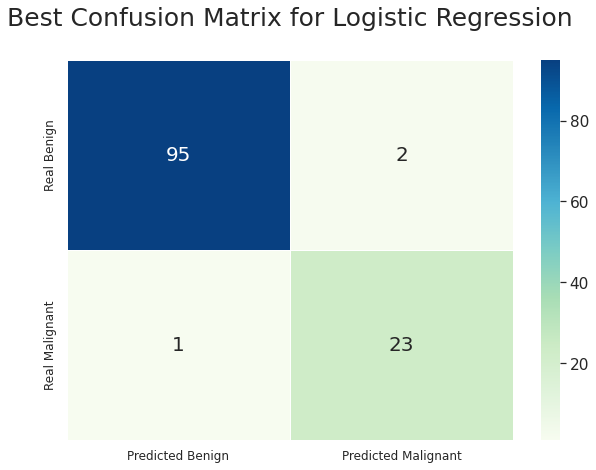

In [0]:
print("*************************************************************************************************")
print("THIS IS JUST A SUMMARY OF LOGISTIC REGRESSION")
print("ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL")
print("*************************************************************************************************")
print("*************************************************************************************************")
print("LOGISTIC REGRESSION ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET")
print("*************************************************************************************************")

print ("Accuracy of Logistic Regression on Input Dataset with all feautures = %0.02f" %ip_all_feat_acc )
print ("Accuracy of Logistic Regression on Input Dataset with Low Correlation Column skipped = %0.02f" %ip_corr_feat_acc )
print ("Accuracy of Logistic Regression on Normalized Dataset with all feautures = %0.02f" %nd_all_feat_acc )
print ("Accuracy of Logistic Regression on Normalized Dataset with Low Correlation Column skipped = %0.02f" %nd_corr_feat_acc )

maximum = max(ip_all_feat_acc, ip_corr_feat_acc, nd_all_feat_acc, nd_corr_feat_acc)

if ip_all_feat_acc == maximum:
    md_confusion_matrix = ip_all_confusion_matrix
elif ip_corr_feat_acc == maximum:
    md_confusion_matrix = ip_corr_confusion_matrix
elif nd_all_feat_acc == maximum:
    md_confusion_matrix = nd_all_confusion_matrix
elif nd_corr_feat_acc == maximum:
    md_confusion_matrix = nd_corr_confusion_matrix

figure = plt.figure(figsize = (10,7))
ax = figure.add_subplot(111)
sns.set(font_scale = 1.4)
sns.heatmap(md_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Best Confusion Matrix for Logistic Regression\n', size = 25)
ax.set_yticklabels(["Real Benign","Real Malignant"], fontsize = 12 );
ax.set_xticklabels(["Predicted Benign", "Predicted Malignant"], fontsize = 12 );
plt.show()

### LOGISTIC REGRESSION ENDS

### NAIVE BAYES STARTS

### NAIVE BAYES
#### Data Preparation, Model Building and Evaluation ENCOMPASSED here. 
- **INPUT DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **INPUT DATASET SKIPPING COLUMNS WITH LESS CORRELATION (SKIPPED MITOSES as correlation was very less)**
- **NORMALIZED DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **NORMALIZED DATASET SKIPPING COLUMNS WITH LESS CORRELATION (SKIPPED MITOSES as correlation was very less)**

**NORMALIZED DATASET IS A DATASET WHICH IS STANDARDIZED(NULL VALUES REPLACED), OUTLIERS REMOVED, NORMALIZATION DONE USING MINMAXSCALER**

Following are taken care for each dataset for the models. Each Models are applied on 4 datasets.
- Data Preparation so that it can be used in Pyspark MLIB
- Splitting of Datasets as Train and Test
- Apply the MLib Models
- Performance Evaluation using Sklearn, UDF Binary Classification, Binary Classification Evaluator, MultiClassMetrics, Binary Classification Metrics
- Performance Evaluation provides following insights Accuracy, Precision, Recall, F1 Score, Sensitivity, Specificity, TP, FP, FN, TN, Confusion Matrix, Area Under ROC, Area Under PR

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upddf.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upddf)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################NAIVE BAYES#######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = NaiveBayes(featuresCol = 'features', labelCol = 'Class',smoothing=1.0)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- NAIVE BAYES EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_all_feat_acc = Accuracy
ip_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- NAIVE BAYES EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.84      0.95      0.89        87
           4       0.90      0.69      0.78        52

    accuracy                           0.86       139
   macro avg       0.87      0.82      0.84       139
weighted avg       0.86      0.86      0.85       139

------------------------------------------------------------------------
Confusion matrix
 [[83  4]
 [16 36]] 


 
*******************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upddf.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")

#selected_features = upddf.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")



#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upddf)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################NAIVE BAYES#######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = NaiveBayes(featuresCol = 'features', labelCol = 'Class',smoothing=1.0)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- NAIVE BAYES EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_corr_feat_acc = Accuracy
ip_corr_confusion_matrix=[[TP,FN],[FP,TN]] 

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- NAIVE BAYES EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.84      0.94      0.89        87
           4       0.88      0.69      0.77        52

    accuracy                           0.85       139
   macro avg       0.86      0.82      0.83       139
weighted avg       0.85      0.85      0.84       139

------------------------------------------------------------------------
Confusion matrix
 [[82  5]
 [16 36]] 


 
*******************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = nd_upd_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(nd_upd_df)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################NAIVE BAYES#######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = NaiveBayes(featuresCol = 'features', labelCol = 'Class',smoothing=1.0)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]

###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- NAIVE BAYES EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_all_feat_acc = Accuracy
nd_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- NAIVE BAYES EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.91      0.99      0.95        97
           4       0.94      0.62      0.75        24

    accuracy                           0.92       121
   macro avg       0.93      0.81      0.85       121
weighted avg       0.92      0.92      0.91       121

------------------------------------------------------------------------
Confusion matrix
 [[96  1]
 [ 9 15]] 


 
*******************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = nd_upd_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")


#selected_features = nd_upd_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(nd_upd_df)

#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################NAIVE BAYES#######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = NaiveBayes(featuresCol = 'features', labelCol = 'Class',smoothing=1.0)

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()


result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- NAIVE BAYES EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)



predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################

from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_corr_feat_acc = Accuracy
nd_corr_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df



ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- NAIVE BAYES EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.90      0.99      0.94        97
           4       0.93      0.54      0.68        24

    accuracy                           0.90       121
   macro avg       0.91      0.77      0.81       121
weighted avg       0.90      0.90      0.89       121

------------------------------------------------------------------------
Confusion matrix
 [[96  1]
 [11 13]] 


 
*******************************

*************************************************************************************************
THIS IS JUST A SUMMARY OF NAIVE BAYES
ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL
*************************************************************************************************
*************************************************************************************************
NAIVE BAYES ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET
*************************************************************************************************
Accuracy of Naive Bayes on Input Dataset with all feautures = 0.87
Accuracy of Naive Bayes on Input Dataset with Low Correlation Column skipped = 0.86
Accuracy of Naive Bayes on Normalized Dataset with all feautures = 0.92
Accuracy of Naive Bayes on Normalized Dataset with Low Correlation Column skipped = 0.90


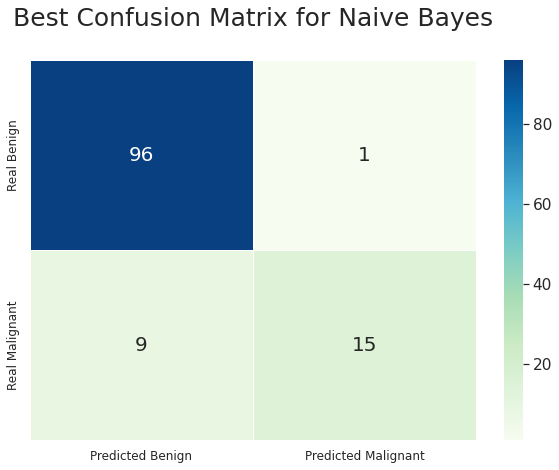

In [0]:
print("*************************************************************************************************")
print("THIS IS JUST A SUMMARY OF NAIVE BAYES")
print("ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL")
print("*************************************************************************************************")
print("*************************************************************************************************")
print("NAIVE BAYES ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET")
print("*************************************************************************************************")

print ("Accuracy of Naive Bayes on Input Dataset with all feautures = %0.02f" %ip_all_feat_acc )
print ("Accuracy of Naive Bayes on Input Dataset with Low Correlation Column skipped = %0.02f" %ip_corr_feat_acc )
print ("Accuracy of Naive Bayes on Normalized Dataset with all feautures = %0.02f" %nd_all_feat_acc )
print ("Accuracy of Naive Bayes on Normalized Dataset with Low Correlation Column skipped = %0.02f" %nd_corr_feat_acc )

maximum = max(ip_all_feat_acc, ip_corr_feat_acc, nd_all_feat_acc, nd_corr_feat_acc) 

if ip_all_feat_acc == maximum:
    md_confusion_matrix = ip_all_confusion_matrix
elif ip_corr_feat_acc == maximum:
    md_confusion_matrix = ip_corr_confusion_matrix
elif nd_all_feat_acc == maximum:
    md_confusion_matrix = nd_all_confusion_matrix
elif nd_corr_feat_acc == maximum:
    md_confusion_matrix = nd_corr_confusion_matrix

figure = plt.figure(figsize = (10,7))
ax = figure.add_subplot(111)
sns.set(font_scale = 1.4)
sns.heatmap(md_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Best Confusion Matrix for Naive Bayes\n', size = 25)
ax.set_yticklabels(["Real Benign","Real Malignant"], fontsize = 12 );
ax.set_xticklabels(["Predicted Benign", "Predicted Malignant"], fontsize = 12 );
plt.show()

### NAIVE BAYES ENDS

### GRADIENT BOOSTING TREE STARTS

### GRADIENT BOOSTING TREE
#### Data Preparation, Model Building and Evaluation ENCOMPASSED here. 
- **INPUT DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **INPUT DATASET SKIPPING COLUMNS WITH LESS CORRELATION(Retained Only "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")**
- **NORMALIZED DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **NORMALIZED DATASET SKIPPING COLUMNS WITH LESS CORRELATION(Retained Only "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")**

**NORMALIZED DATASET IS A DATASET WHICH IS STANDARDIZED(NULL VALUES REPLACED), OUTLIERS REMOVED, NORMALIZATION DONE USING MINMAXSCALER**

Following are taken care for each dataset for the models. Each Models are applied on 4 datasets.
- Data Preparation so that it can be used in Pyspark MLIB
- Splitting of Datasets as Train and Test
- Apply the MLib Models
- Performance Evaluation using Sklearn, UDF Binary Classification, Binary Classification Evaluator, MultiClassMetrics, Binary Classification Metrics
- Performance Evaluation provides following insights Accuracy, Precision, Recall, F1 Score, Sensitivity, Specificity, TP, FP, FN, TN, Confusion Matrix, Area Under ROC, Area Under PR

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = upddf.withColumn("Class", when((upddf.Class == 2), lit(0)).when((upddf.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#########################GRADIENT BOOSTING TREE################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = GBTClassifier(featuresCol = 'features', labelCol = 'Class')
#, maxIter=5, maxDepth=2, seed=42

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- GRADIENT BOOSTING TREE EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_all_feat_acc = Accuracy
ip_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- GRADIENT BOOSTING TREE EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.93      0.95      0.94        87
           4       0.92      0.88      0.90        52

    accuracy                           0.93       139
   macro avg       0.93      0.92      0.92       139
weighted avg       0.93      0.93      0.93       139

------------------------------------------------------------------------
Confusion matrix
 [[83  4]
 [ 6 46]] 


 
********************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = upddf.withColumn("Class", when((upddf.Class == 2), lit(0)).when((upddf.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

#selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", #"Bland_Chromatin", "Normal_Nucleoli")

selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#########################GRADIENT BOOSTING TREE################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = GBTClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- GRADIENT BOOSTING TREE EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_corr_feat_acc = Accuracy
ip_corr_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- GRADIENT BOOSTING TREE EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.93      0.94      0.94        87
           4       0.90      0.88      0.89        52

    accuracy                           0.92       139
   macro avg       0.92      0.91      0.92       139
weighted avg       0.92      0.92      0.92       139

------------------------------------------------------------------------
Confusion matrix
 [[82  5]
 [ 6 46]] 


 
********************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = nd_upd_df.withColumn("Class", when((nd_upd_df.Class == 2), lit(0)).when((nd_upd_df.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses")

#selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#########################GRADIENT BOOSTING TREE################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = GBTClassifier(featuresCol = 'features', labelCol = 'Class')
#, maxIter=5, maxDepth=2

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- GRADIENT BOOSTING TREE EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_all_feat_acc = Accuracy
nd_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- GRADIENT BOOSTING TREE EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.99      0.92      0.95        97
           4       0.74      0.96      0.84        24

    accuracy                           0.93       121
   macro avg       0.87      0.94      0.89       121
weighted avg       0.94      0.93      0.93       121

------------------------------------------------------------------------
Confusion matrix
 [[89  8]
 [ 1 23]] 


 
********************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = nd_upd_df.withColumn("Class", when((nd_upd_df.Class == 2), lit(0)).when((nd_upd_df.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

#selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", #"Bland_Chromatin", "Normal_Nucleoli")

selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#########################GRADIENT BOOSTING TREE################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = GBTClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)

predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- GRADIENT BOOSTING TREE EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_corr_feat_acc = Accuracy
nd_corr_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()


************************************************************************
************************************************************************
-- GRADIENT BOOSTING TREE EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.99      0.96      0.97        97
           4       0.85      0.96      0.90        24

    accuracy                           0.96       121
   macro avg       0.92      0.96      0.94       121
weighted avg       0.96      0.96      0.96       121

------------------------------------------------------------------------
Confusion matrix
 [[93  4]
 [ 1 23]] 


 
********************

*************************************************************************************************
THIS IS JUST A SUMMARY OF GRADIENT BOOSTING TREE
ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL
*************************************************************************************************
*************************************************************************************************
GRADIENT BOOSTING TREE ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET
*************************************************************************************************
Accuracy of Gradient Boosting Tree on Input Dataset with all feautures = 0.93
Accuracy of Gradient Boosting Tree on Input Dataset with Low Correlation Column skipped = 0.94
Accuracy of Gradient Boosting Tree on Normalized Dataset with all feautures = 0.93
Accuracy of Gradient Boosting Tree on Normalized Dataset with Low Correlation Column skipped = 0.96


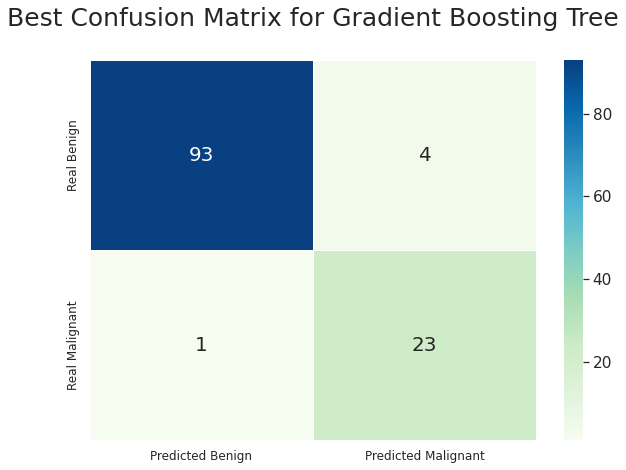

In [0]:
print("*************************************************************************************************")
print("THIS IS JUST A SUMMARY OF GRADIENT BOOSTING TREE")
print("ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL")
print("*************************************************************************************************")
print("*************************************************************************************************")
print("GRADIENT BOOSTING TREE ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET")
print("*************************************************************************************************")

print ("Accuracy of Gradient Boosting Tree on Input Dataset with all feautures = %0.02f" %ip_all_feat_acc )
print ("Accuracy of Gradient Boosting Tree on Input Dataset with Low Correlation Column skipped = %0.02f" %ip_corr_feat_acc )
print ("Accuracy of Gradient Boosting Tree on Normalized Dataset with all feautures = %0.02f" %nd_all_feat_acc )
print ("Accuracy of Gradient Boosting Tree on Normalized Dataset with Low Correlation Column skipped = %0.02f" %nd_corr_feat_acc )


maximum = max(ip_all_feat_acc, ip_corr_feat_acc, nd_all_feat_acc, nd_corr_feat_acc)

if ip_all_feat_acc == maximum:
    md_confusion_matrix = ip_all_confusion_matrix
elif ip_corr_feat_acc == maximum:
    md_confusion_matrix = ip_corr_confusion_matrix
elif nd_all_feat_acc == maximum:
    md_confusion_matrix = nd_all_confusion_matrix
elif nd_corr_feat_acc == maximum:
    md_confusion_matrix = nd_corr_confusion_matrix

figure = plt.figure(figsize = (10,7))
ax = figure.add_subplot(111)
sns.set(font_scale = 1.4)
sns.heatmap(md_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Best Confusion Matrix for Gradient Boosting Tree\n', size = 25)
ax.set_yticklabels(["Real Benign","Real Malignant"], fontsize = 12 );
ax.set_xticklabels(["Predicted Benign", "Predicted Malignant"], fontsize = 12 );
plt.show()

### GRADIENT BOOSTING TREE ENDS

### RANDOM FOREST STARTS

### RANDOM FOREST
#### Data Preparation, Model Building and Evaluation ENCOMPASSED here. 
- **INPUT DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **INPUT DATASET SKIPPING COLUMNS WITH LESS CORRELATION(DROPPED MITOSES)**
- **NORMALIZED DATASET WITH ALL FEATURE COLUMNS(SKIPPED SNo-Sample_Code_Number in feature creation)**
- **NORMALIZED DATASET SKIPPING COLUMNS WITH LESS CORRELATION(Dropped MITOSIS)**

**NORMALIZED DATASET IS A DATASET WHICH IS STANDARDIZED(NULL VALUES REPLACED), OUTLIERS REMOVED, NORMALIZATION DONE USING MINMAXSCALER**

Following are taken care for each dataset for the models. Each Models are applied on 4 datasets.
- Data Preparation so that it can be used in Pyspark MLIB
- Splitting of Datasets as Train and Test
- Apply the MLib Models
- Performance Evaluation using Sklearn, UDF Binary Classification, Binary Classification Evaluator, MultiClassMetrics, Binary Classification Metrics
- Performance Evaluation provides following insights Accuracy, Precision, Recall, F1 Score, Sensitivity, Specificity, TP, FP, FN, TN, Confusion Matrix, Area Under ROC, Area Under PR

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = upddf.withColumn("Class", when((upddf.Class == 2), lit(0)).when((upddf.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################RANDOM FOREST#####################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- RANDOM FOREST EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_all_feat_acc = Accuracy
ip_all_confusion_matrix=[[TP,FN],[FP,TN]]

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()


************************************************************************
************************************************************************
-- RANDOM FOREST EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        52

    accuracy                           0.96       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.96      0.96      0.96       139

------------------------------------------------------------------------
Confusion matrix
 [[84  3]
 [ 3 49]] 


 
*****************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = upddf.withColumn("Class", when((upddf.Class == 2), lit(0)).when((upddf.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")



#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
#############################RANDOM FOREST#####################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- RANDOM FOREST EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

ip_corr_feat_acc = Accuracy
ip_corr_confusion_matrix=[[TP,FN],[FP,TN]] 

print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")


print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- RANDOM FOREST EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        52

    accuracy                           0.95       139
   macro avg       0.95      0.94      0.95       139
weighted avg       0.95      0.95      0.95       139

------------------------------------------------------------------------
Confusion matrix
 [[84  3]
 [ 4 48]] 


 
*****************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = nd_upd_df.withColumn("Class", when((nd_upd_df.Class == 2), lit(0)).when((nd_upd_df.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses")

#selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp","Bare_Nuclei")

#selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
############################RANDOM FOREST######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- RANDOM FOREST EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION USER DEFINED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
evaluator = BCE()
#auc = evaluator.evaluate(prediction, {evaluator.metricName: 'areaUnderROC'})
print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))

#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_all_feat_acc = Accuracy

#####################################################################################
####BEST DATASET OUTPUT IN  RANDOM FOREST COLLATING PARAMETERS FOR CONFUSION MATRIX##
#####################################################################################
nd_all_confusion_matrix=[[TP,FN],[FP,TN]]


print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- TEST DATASET SUMMARIES OF AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- RANDOM FOREST EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       1.00      0.97      0.98        97
           4       0.89      1.00      0.94        24

    accuracy                           0.98       121
   macro avg       0.94      0.98      0.96       121
weighted avg       0.98      0.98      0.98       121

------------------------------------------------------------------------
Confusion matrix
 [[94  3]
 [ 0 24]] 


 
*****************************

In [0]:
spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
#upddf HAS ALL THE DATA STANDARDIZED
#final_df_no_outliers IS DATASET STANDARDIZED AND HAS NO OUTLIERS
#nd_upd_df is DATASET 


upd_inter_df = nd_upd_df.withColumn("Class", when((nd_upd_df.Class == 2), lit(0)).when((nd_upd_df.Class == 4), lit(1)))
###############################################################################
###############################DATA PREPARATION################################
###############################################################################

selected_features = upd_inter_df.select("Clump_Tk", "Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Mrgnl_Adsion", "Sngl_Epith_Cell_Sz", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli")

#selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp","Bare_Nuclei")

#selected_features = upd_inter_df.select("Uniformity_Cell_Sz", "Uniformity_Cell_Sp", "Bare_Nuclei")

#A FEATURE TRANSFORMER THAT MERGES MULTIPLE COLUMNS INTO A VECTOR COLUMN. VECTORIZING IS DONE BECAUSE THE ML MODELS OF PYSPARK EXPECTS INPUT IN VECTORIZED FORMAT

assembler = VectorAssembler(inputCols=selected_features.columns,
                           outputCol='features',
                           handleInvalid='skip')

upd_vec_df = assembler.transform(upd_inter_df)


#Tried scaling of features and without it as well. The Result set(ACCURACY, PRECISION ETC) did not change hence did not scale features.

#scaler_inter = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#scale_data = scaler_inter.fit(upd_vec_df).transform(upd_vec_df)

###############################################################################
############################MODEL BUILDING#####################################
############################RANDOM FOREST######################################
#########################USING PYSPARK MLIB####################################
###############################################################################

train_df, test_df = upd_vec_df.select('SNo', 'Class','features').randomSplit([0.8,0.2], seed=140)

lr = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class')

lr_model = lr.fit(train_df)
predictionslr = lr_model.transform(test_df)


predictionslr = predictionslr.withColumn("prediction", when((predictionslr.prediction == 0), lit(2)).when((predictionslr.prediction == 1), lit(4)))
predictionslr = predictionslr.withColumn("Class", when((predictionslr.Class == 0), lit(2)).when((predictionslr.Class == 1), lit(4)))

test_inter_df = test_df.withColumn("Class", when((test_df.Class == 0), lit(2)).when((test_df.Class == 1), lit(4)))

#---------------------------------------------------


###############################################################################
########################PERFORMANCE EVALUATION#################################
###############################################################################
lrpredictB = predictionslr[predictionslr.prediction==2].toPandas()
lrpredictM = predictionslr[predictionslr.prediction==4].toPandas()

result = pd.concat([lrpredictB,lrpredictM])

true_labels=(test_inter_df.orderBy("SNo").select("Class")).toPandas()

predicted_labels=result.sort_values("SNo")["prediction"]


###############################################################################
###########################MODEL EVALUATION USING SKLEARN######################
###############################################################################
print("************************************************************************")
print("************************************************************************")
print("-- RANDOM FOREST EVALUATION --")
print("************************************************************************")
print("************************************************************************")
print("-- MODEL EVALUATION USING SKLEARN --")
print("************************************************************************")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)
print(" ")
#---------------------------------------------------

predictionslr_df = predictionslr.withColumn("cval", when((predictionslr.prediction == 2), lit(2)).when((predictionslr.prediction == 4), lit(4))).withColumn("wval", when((predictionslr.prediction == 2), lit(4)).when((predictionslr.prediction == 4), lit(2)))

predictionslr_B_df = predictionslr.filter(predictionslr['prediction']==2)
predictionslr_M_df = predictionslr.filter(predictionslr['prediction']==4)

predictionslr_B_df = predictionslr_B_df.withColumn("cval",lit(2)).withColumn("wval",lit(4))
predictionslr_M_df = predictionslr_M_df.withColumn("cval",lit(4)).withColumn("wval",lit(2))

###############################################################################
###MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION CODED#################
###############################################################################
print("************************************************************************")
print("-- MODEL EVALUATION USING BINARY CLASSIFICATION FUNCTION USER DEFINED --")
print("************************************************************************")
bin_class_val(predictionslr_df)

###############################################################################
###MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR##############
###############################################################################


from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

TN = predictionslr.filter('prediction = 4 AND Class = prediction').count()
TP = predictionslr.filter('prediction = 2 AND Class = prediction').count()
FN = predictionslr.filter('prediction = 4 AND Class <> prediction').count()
FP = predictionslr.filter('prediction = 2 AND Class <> prediction').count()

predictionslr.groupBy('Class', 'prediction').count().show()

# calculate metrics by the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

# calculate auc
#evaluator = BCE()
#p_and_l = predictionslr.withColumn('label', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

#p_and_l.show()

#auct = evaluator.evaluate(p_and_l, {evaluator.metricName: 'areaUnderROC'})
#print("Test Area Under ROC: " + str(auct))



print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARY CLASSIFICATION EVALUATOR --")
print("************************************************************************")
print('precision: %0.16f' % precision)
print('recall: %0.16f' % recall)
print('accuracy: %0.16f' % accuracy)
print('F1 score: %0.16f' % F)
print(" ")
#print('AUC: %0.3f' % auc)


###############################################################################
############MODEL EVALUATION USING PYSPARK MULTICLASS METRICS##################
###############################################################################
#select only prediction and label columns

preds_and_labels = predictionslr.select(['prediction','Class']).withColumn('Class', COL('Class').cast(FloatType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')

metrics = MCM(preds_and_labels.rdd.map(tuple))


#confusion matrix
cm_dt_result = predictionslr.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result.sort_values(by = ['prediction_Class'])

print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK MULTICLASSMETRICS ---")
print("************************************************************************")

#print(cm_dt_result.sort_values(by = ['prediction_Class']))

#calculate accuracy, sensitivity, specificity and precision
TP = cm_dt_result["2"][0]
FP = cm_dt_result["4"][0]
TN = cm_dt_result["4"][1]
FN = cm_dt_result["2"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

nd_corr_feat_acc = Accuracy
nd_corr_confusion_matrix=[[TP,FN],[FP,TN]]



print ("Accuracy = %0.16f" %Accuracy )
print ("Sensitivity = %0.16f" %Sensitivity )
print ("Specificity = %0.16f" %Specificity )
print ("Precision = %0.16f" %Precision )
print("***********confusion Matrix***************")
print(metrics.confusionMatrix().toArray())
print(" ")


print("************************************************************************")
print("-- MODEL EVALUATION USING PYSPARK BINARYCLASSIFICATION METRICS ---")
print("************************************************************************")

lrpredictions = lr_model.transform(test_df)

scoreAndLabels = lrpredictions.select(['Class','prediction']).withColumn('Class', COL('Class').cast(DoubleType())).withColumn('prediction', COL('prediction').cast(DoubleType())).orderBy('prediction')


bcmmetrics = BCM(scoreAndLabels.rdd.map(tuple))
#bcmmetrics = BCM(lrpredictions['Class','prediction'].rdd)

auc = bcmmetrics.areaUnderROC
aupr = bcmmetrics.areaUnderPR
print("************************************************************************")
print("-- SUMMARIES OF AUPR and AUROC ---")
print("************************************************************************")
print ("Area Under Precision Recall = %0.16f" %aupr )
print ("Area Under the receiver operating characteristic (ROC) curve = %0.16f" %auc )
print(" ")

print("************************************************************************")
print("-- LOG LOSS ---")
print("************************************************************************")

ll_tr_df = train_df
ll_tst_df = test_df


#ll_tr_df = train_df.withColumn("Class", when((train_df.Class == 2), lit(0)).when((train_df.Class == 4), lit(1)))
#ll_tst_df = test_df.withColumn("Class", when((test_df.Class == 2), lit(0)).when((test_df.Class == 4), lit(1)))


lr_model = lr.fit(ll_tr_df)
ll_pr_df = lr_model.transform(ll_tst_df)

ll_pr_df = ll_pr_df.withColumn("label",ll_pr_df.Class)


get_fst_ele = udf(lambda v: float(v[1]), FloatType())
ll_pr_df = ll_pr_df.withColumn("pred", get_fst_ele(COL("probability")))

ll_df = log_loss(ll_pr_df)
ll = (ll_df.select(mean("log_loss")))

ll.show()

************************************************************************
************************************************************************
-- RANDOM FOREST EVALUATION --
************************************************************************
************************************************************************
-- MODEL EVALUATION USING SKLEARN --
************************************************************************
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           2       0.99      0.95      0.97        97
           4       0.82      0.96      0.88        24

    accuracy                           0.95       121
   macro avg       0.91      0.95      0.93       121
weighted avg       0.96      0.95      0.95       121

------------------------------------------------------------------------
Confusion matrix
 [[92  5]
 [ 1 23]] 


 
*****************************

*********************************************************************************************************
THIS IS JUST A SUMMARY OF RANDOM FOREST ACCURACY
ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL
*********************************************************************************************************
*************************************************************************************************
RANDOM FOREST ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET
*************************************************************************************************
Accuracy of Random Forest on Input Dataset with all feautures = 0.97
Accuracy of Random Forest on Input Dataset with Low Correlation Column skipped = 0.95
Accuracy of Random Forest on Normalized Dataset with all feautures = 0.98
Accuracy of Random Forest on Normalized Dataset with Low Correlation Column skipped = 0.95


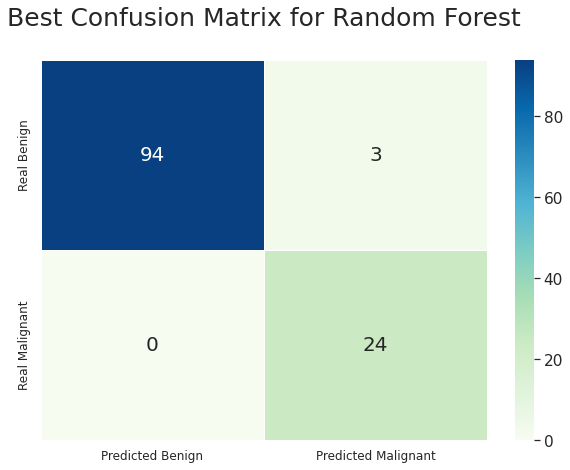

In [0]:
print("*********************************************************************************************************")
print("THIS IS JUST A SUMMARY OF RANDOM FOREST ACCURACY")
print("ACCURACY, PRECISION, RECALL, PRECISION FOR EACH OF DATASET CAN BE SEEN IN PRIOR COMMAND OUTPUTS IN DETAIL")
print("*********************************************************************************************************")
print("*************************************************************************************************")
print("RANDOM FOREST ACCURACY WITH INPUT DATASET AND NORMALIZED DATASET")
print("*************************************************************************************************")

print ("Accuracy of Random Forest on Input Dataset with all feautures = %0.02f" %ip_all_feat_acc )
print ("Accuracy of Random Forest on Input Dataset with Low Correlation Column skipped = %0.02f" %ip_corr_feat_acc )
print ("Accuracy of Random Forest on Normalized Dataset with all feautures = %0.02f" %nd_all_feat_acc )
print ("Accuracy of Random Forest on Normalized Dataset with Low Correlation Column skipped = %0.02f" %nd_corr_feat_acc )

maximum = max(ip_all_feat_acc, ip_corr_feat_acc, nd_all_feat_acc, nd_corr_feat_acc)

if ip_all_feat_acc == maximum:
    md_confusion_matrix = ip_all_confusion_matrix
elif ip_corr_feat_acc == maximum:
    md_confusion_matrix = ip_corr_confusion_matrix
elif nd_all_feat_acc == maximum:
    md_confusion_matrix = nd_all_confusion_matrix
elif nd_corr_feat_acc == maximum:
    md_confusion_matrix = nd_corr_confusion_matrix

figure = plt.figure(figsize = (10,7))
ax = figure.add_subplot(111)
sns.set(font_scale = 1.4)
sns.heatmap(md_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Best Confusion Matrix for Random Forest\n', size = 25)
ax.set_yticklabels(["Real Benign","Real Malignant"], fontsize = 12 );
ax.set_xticklabels(["Predicted Benign", "Predicted Malignant"], fontsize = 12 );
plt.show()

### RANDOM FOREST ENDS